<span style="font-family: Open Sans; font-weight: 800; font-size: 40px; font-style: normal; text-align:center;">

Especialización Inteligecia Artificial - CEIA

</span>

<span style="font-family: Open Sans; font-weight: 700; font-size: 30px; font-style: normal; text-align:center;">

Análisis de datos 

Trabajo práctico integrador

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 20px; font-style: normal;">

<u>Autores</u>:
- Karen Raczkowski @raczki
- Juan Ignacio Ribet @Juaniribet
- FS @BenjaSar

</span>

## Tabla de contenido
----

1. [Planteamiento del problema](#1-planteamiento-del-problema)<br>
1.1 [Lego database](#11-lego-database)<br>
1.2 [Importación de las librerías necesarias](#importación-de-las-librerías-necesarias-para-el-trabajo)<br>
2. [Análisis básicos de los *datasets*](#análisis-básico-de-los-datasets)<br>
3. [¿Como evolucionaron los *sets* de lego en tamñao a través de los años](#3-¿cómo-evolucionaron-los-sets-de-lego-en-tamaño-a-través-de-los-años)<br>
4. [¿Podría predecir a que temática pertenece un set basado en el contenido de este](#¿podría-predecir-a-que-temática-pertenece-un-set-basado-en-el-contenido-de-este)<br>
4.1 [Reducción de dimensionalidad](#5-reducción-de-dimensionalidad)<br>
4.2 [Análisis exploratorio](#42-análisis-exploratorio)<br>
4.3 [Tipos de variables](#43-tipos-de-variables)<br>
4.4 [Análsis de temáticas y colores más comunes](#44-análisis-de-temáticas-y-colores-más-comunes)<br>
4.5 [Análisis de categorías de piezas](#45-análisis-de-categorías-de-piezas)<br>
4.6 [Preparación de features](#46-preparación-de-features)<br>
4.7 [Selección de features](#47-selección-de-features)<br>
5. [Licencia](#Licencia)


<span style="font-family: Open Sans; font-weight: 400; font-size: 19px; font-style: normal">

## 1. Planteamiento del problema
---

### 1.1 **LEGO database**

 - ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
 - ¿Podría predecir a que temática pertenece un set basado en el contenido de este?

 </span>
 

 ![Data set Schema](https://rebrickable.com/static/img/diagrams/downloads_schema_v3.png)

<span style="font-family: Open Sans; font-weight: 100; font-size: 19px; font-style: normal;">

Para responder las preguntas planteadas vamos a utilizar los siguientes datasets que nos van a dar la información de lo que contiene cada set de Lego:

- themes
- sets
- inventories
- inventory_parts
- colors
- parts
- part_categories

</span>

#### 1.2 Importación de las librerías necesarias para el trabajo.

In [1]:
# Importamos librerías 
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import plotly.express as px

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Categorical transformations
import category_encoders as ce
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder


# Partición de train-test set
from sklearn.model_selection import train_test_split

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Training schemas
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

from functools import reduce

from sklearn.feature_extraction import FeatureHasher

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [2]:
#Cargamos las urls donde se encuentran los datasets. Links obtenidos de https://rebrickable.com/downloads/

url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_sets ='https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'


# url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
# url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'
# url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
# url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
# url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'

In [3]:
#Creamos los DataFrames

themes = pd.read_csv(url_themes, delimiter=',') #(3.9 KB)
sets = pd.read_csv(url_sets, delimiter=',') #(379.9 KB)
inventories = pd.read_csv(url_inventories, delimiter=',') #(194.1 KB)
inventory_parts = pd.read_csv(url_inventory_parts, delimiter=',') #(9.9 MB)
colors = pd.read_csv(url_colors, delimiter=',') #(2.5 KB)
parts = pd.read_csv(url_parts, delimiter=',') #(839.0 KB)
part_categories = pd.read_csv(url_part_categories, delimiter=',') #(725 bytes)

# inventory_sets = pd.read_csv(url_inventory_sets, delimiter=',') #(14.1 KB)
# inventory_minifigs = pd.read_csv(url_inventory_minifigs, delimiter=',') #(76.2 KB)
# minifigs = pd.read_csv(url_minifigs, delimiter=',') #(223.2 KB)
# part_relationships = pd.read_csv(url_part_relationships, delimiter=',') #(149.0 KB)
# elements = pd.read_csv(url_elements, delimiter=',') #(586.8 KB)

In [3]:
# Opcional: correr esto si arriba da SSLCertVerificationError

import urllib.request
import gzip
import ssl

# Create an SSL context with certificate verification disabled
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Specify the URLs of the datasets
url_themes = 'https://cdn.rebrickable.com/media/downloads/themes.csv.gz'
url_colors = 'https://cdn.rebrickable.com/media/downloads/colors.csv.gz'
url_part_categories = 'https://cdn.rebrickable.com/media/downloads/part_categories.csv.gz'
url_parts = 'https://cdn.rebrickable.com/media/downloads/parts.csv.gz'
url_part_relationships = 'https://cdn.rebrickable.com/media/downloads/part_relationships.csv.gz'
url_elements = 'https://cdn.rebrickable.com/media/downloads/elements.csv.gz'
url_sets = 'https://cdn.rebrickable.com/media/downloads/sets.csv.gz'
url_minifigs = 'https://cdn.rebrickable.com/media/downloads/minifigs.csv.gz'
url_inventories = 'https://cdn.rebrickable.com/media/downloads/inventories.csv.gz'
url_inventory_parts = 'https://cdn.rebrickable.com/media/downloads/inventory_parts.csv.gz'
url_inventory_sets = 'https://cdn.rebrickable.com/media/downloads/inventory_sets.csv.gz'
url_inventory_minifigs = 'https://cdn.rebrickable.com/media/downloads/inventory_minifigs.csv.gz'

try:
    # Read the compressed CSV data with SSL context
    themes_data = urllib.request.urlopen(url_themes, context=ssl_context)
    colors_data = urllib.request.urlopen(url_colors, context=ssl_context)
    part_categories_data = urllib.request.urlopen(url_part_categories, context=ssl_context)
    parts_data = urllib.request.urlopen(url_parts, context=ssl_context)
    part_relationships_data = urllib.request.urlopen(url_part_relationships, context=ssl_context)
    elements_data = urllib.request.urlopen(url_elements, context=ssl_context)
    sets_data = urllib.request.urlopen(url_sets, context=ssl_context)
    minifigs_data = urllib.request.urlopen(url_minifigs, context=ssl_context)
    inventories_data = urllib.request.urlopen(url_inventories, context=ssl_context)
    inventory_parts_data = urllib.request.urlopen(url_inventory_parts, context=ssl_context)
    inventory_sets_data = urllib.request.urlopen(url_inventory_sets, context=ssl_context)
    inventory_minifigs_data = urllib.request.urlopen(url_inventory_minifigs, context=ssl_context)

    # Decompress the data and read into DataFrames
    themes = pd.read_csv(gzip.GzipFile(fileobj=themes_data), delimiter=',')
    colors = pd.read_csv(gzip.GzipFile(fileobj=colors_data), delimiter=',')
    part_categories = pd.read_csv(gzip.GzipFile(fileobj=part_categories_data), delimiter=',')
    parts = pd.read_csv(gzip.GzipFile(fileobj=parts_data), delimiter=',')
    part_relationships = pd.read_csv(gzip.GzipFile(fileobj=part_relationships_data), delimiter=',')
    elements = pd.read_csv(gzip.GzipFile(fileobj=elements_data), delimiter=',')
    sets = pd.read_csv(gzip.GzipFile(fileobj=sets_data), delimiter=',')
    minifigs = pd.read_csv(gzip.GzipFile(fileobj=minifigs_data), delimiter=',')
    inventories = pd.read_csv(gzip.GzipFile(fileobj=inventories_data), delimiter=',')
    inventory_parts = pd.read_csv(gzip.GzipFile(fileobj=inventory_parts_data), delimiter=',')
    inventory_sets = pd.read_csv(gzip.GzipFile(fileobj=inventory_sets_data), delimiter=',')
    inventory_minifigs = pd.read_csv(gzip.GzipFile(fileobj=inventory_minifigs_data), delimiter=',')                                           

except urllib.error.URLError as e:
    print("An error occurred while accessing the URL:", e)

## 2. Análisis básico de los datasets
---

En esta sección, exploramos la informacion que contiene cada DataFrame que vamos a utilizar.

```Themes```: Este dataset incluye información sobre temas de Lego. Cada tema recibe un número de identificación único ("id"), un nombre ("name") y (si es parte de un tema más grande) de qué tema es parte ("parent_id").

In [6]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [7]:
#Verificamos valores nulos
themes.isnull().sum()

id             0
name           0
parent_id    144
dtype: int64

In [8]:
#Verificamos tipos de variables
themes.dtypes

id             int64
name          object
parent_id    float64
dtype: object

In [9]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in themes.columns:
    print(i,':',   len(themes[i].unique()))

id : 465
name : 382
parent_id : 56


```Sets```: Este archivo contiene información sobre los sets de LEGO, incluido un número de identificación único para cada set ("set_num"), el nombre del set ("name"), el año en que se lanzó ("year"), su tema ("theme_id"), cuántas partes incluye ("num_parts") y URL que contienen fotos de cada set ("img_url").

In [11]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [12]:
#Verificamos valores nulos
sets.isnull().sum()

set_num      0
name         0
year         0
theme_id     0
num_parts    0
img_url      0
dtype: int64

In [13]:
#Verificamos tipos de variables
sets.dtypes

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
img_url      object
dtype: object

In [14]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in sets.columns:
    print(i,':',   len(sets[i].unique()))

set_num : 21295
name : 18216
year : 73
theme_id : 458
num_parts : 1429
img_url : 21295


Inventories: Esta tabla contiene información sobre inventarios, incluida una identificación única ("id"), su versión ("version") y el número del set ("set_num").

In [15]:
inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [16]:
#Verificamos valores nulos
inventories.isnull().sum()

id         0
version    0
set_num    0
dtype: int64

In [17]:
#Verificamos tipos de variables
inventories.dtypes

id          int64
version     int64
set_num    object
dtype: object

In [18]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventories.columns:
    print(i,':',   len(inventories[i].unique()))

id : 36297
version : 16
set_num : 34679


Inventory_parts: Este dataset contiene información sobre los inventarios de piezas, incluido un número de identificación único ("inventory_id"), el número de pieza ("part_num"), el color de la pieza ("color_id"), cuántas de ellas se incluyen ("quantity") y si se trata de un repuesto ("is_spare").

In [19]:
inventory_parts.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,stickerupn0077,9999,1,f,NaN
3,1,upn0342,0,1,f,NaN
4,1,upn0350,25,1,f,NaN


In [20]:
#Verificamos valores nulos
inventory_parts.isnull().sum()

inventory_id       0
part_num           0
color_id           0
quantity           0
is_spare           0
img_url         8239
dtype: int64

In [21]:
#Verificamos tipos de variables
inventory_parts.dtypes

inventory_id     int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
img_url         object
dtype: object

In [22]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in inventory_parts.columns:
    print(i,':',   len(inventory_parts[i].unique()))

inventory_id : 31769
part_num : 50056
color_id : 212
quantity : 379
is_spare : 2
img_url : 72708


```Parts```: Este dataset incluye información sobre piezas de lego, incluido un número de identificación único para cada pieza ("part_num"), el nombre de la pieza ("name"), la categoría de la que proviene ("part_cat_id") y su material ("part_material").

In [23]:
parts.head()

,part_num,name,part_cat_id,part_material
0,003381,Sticker Sheet for Set 663-1,58,Plastic
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic
3,003429,Sticker Sheet for Set 1550-1,58,Plastic
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic


In [24]:
#Verificamos valores nulos
parts.isnull().sum()

part_num         0
name             0
part_cat_id      0
part_material    0
dtype: int64

In [25]:
#Verificamos tipos de variables
parts.dtypes

part_num         object
name             object
part_cat_id       int64
part_material    object
dtype: object

In [26]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in parts.columns:
    print(i,':',   len(parts[i].unique()))

part_num : 51611
name : 51106
part_cat_id : 66
part_material : 6


```Colors```: Esta data contiene información sobre los colores de LEGO, incluida una identificación única para cada color ("id"), su nombre ("name") y el valor RGB aproximado ("rgb"), y si es transparente ("is_trans").

In [27]:
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [28]:
#Verificamos valores nulos
colors.isnull().sum()

id          0
name        0
rgb         0
is_trans    0
dtype: int64

In [29]:
#Verificamos tipos de variables
colors.dtypes

id           int64
name        object
rgb         object
is_trans    object
dtype: object

In [30]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in colors.columns:
    print(i,':',   len(colors[i].unique()))

id : 223
name : 223
rgb : 194
is_trans : 2


```Part_categories```: Este dataset incluye información sobre la categoría de la pieza ("name") y una identificación única para esa categoría de pieza ("id").

In [31]:
part_categories.head()

,id,name
0,1,Baseplates
1,3,Bricks Sloped
2,4,"Duplo, Quatro and Primo"
3,5,Bricks Special
4,6,Bricks Wedged


In [32]:
#Verificamos los valores nulos
part_categories.isnull().sum()

id      0
name    0
dtype: int64

In [33]:
#Contamos la cantidad de valores únicos que tiene cada columna.
for i in part_categories.columns:
    print(i,':',   len(part_categories[i].unique()))

id : 66
name : 66


## 3. ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
---

Para responder la primera pregunta utilizamos la informacion del DataFrame *'sets'*.

In [4]:
year = sets['year'].sort_values().unique()

#Calculamos la media de cantidad de piezas de cada set por año y armamos un dataframe
sets_mean_size_year = np.array(sets[['year','num_parts']].groupby(by='year').mean())[:,0].round(0)
sets_size_evolution = pd.DataFrame(sets_mean_size_year, year, columns=['sets_mean_size'])
sets_size_evolution

,sets_mean_size
1949,100.0
1950,1.0
1953,12.0
1954,8.0
1955,12.0
...,...
2019,189.0
2020,210.0
2021,233.0
2022,284.0


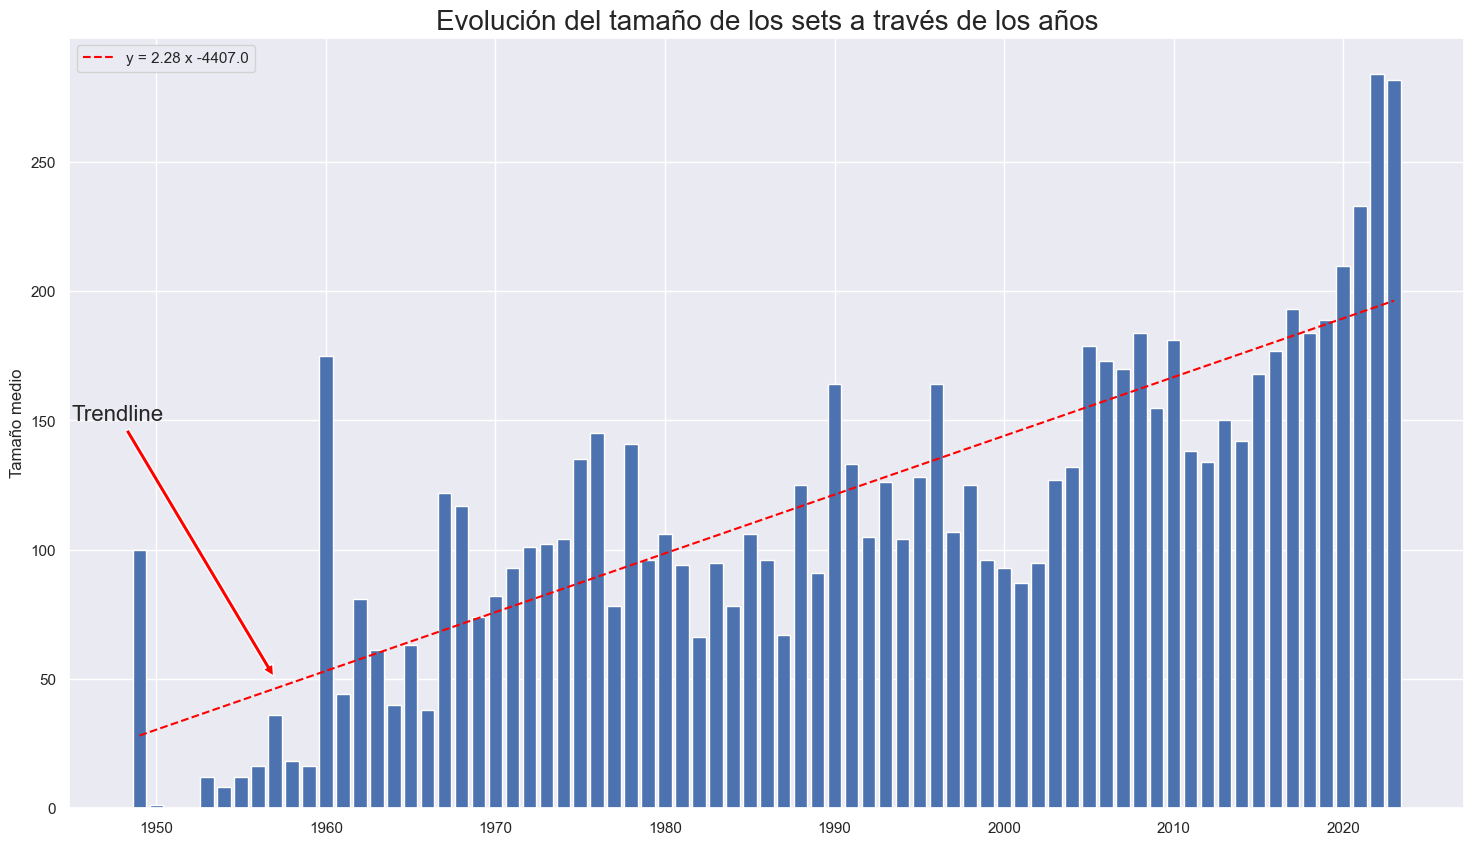

In [35]:
#Graficamos la evolución de la cantidad de piezas media por año.

z = np.polyfit(year, sets_mean_size_year, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(figsize=(18,10))
ax.bar(year, sets_mean_size_year)
ax.set_ylabel('Tamaño medio')
ax.plot(year, p(year), c='red', linestyle='dashed', label = f'y = {p.c.round(2)[0]} x {p.c.round(0)[1]}')
ax.set_title('Evolución del tamaño de los sets a través de los años',fontsize=20)
ax.annotate('Trendline',(1957,50), xytext=(1945,150), fontsize=16, arrowprops=dict(arrowstyle='simple', facecolor='red'))
ax.legend(loc='upper left')
plt.show()

Se puede observar en el grafico como la media de la cantidad de piezas de cada set fue evolucionando a través de los años. La línea de tendencia es creciente con la fórmula mostrada.

## 4. ¿Podría predecir a que temática pertenece un set basado en el contenido de este?
---
Para responder esta pregunta vamos a unir los DataFrames para poder obtener información sobre qué piezas contiene cada set y las características de las mismas.

Antes de eso, vamos a realizar una exploracion de los datasets con un ejemplo para poder entender cómo obtener la información.

In [5]:
#Buscamos un ejemplo de set en 'sets', elegimos un set icónico como es la torre Eiffel.
sets[sets['set_num'] == '10307-1']

,set_num,name,year,theme_id,num_parts,img_url
399,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...


<img src="https://cdn.rebrickable.com/media/sets/10307-1.jpg"  width="300" height="600">

In [6]:
#Buscamos el mismo set en 'inventories'
inventories[inventories['set_num'] == '10307-1']

,id,version,set_num
34049,150356,1,10307-1


In [7]:
#Tomamos el id de 'inventories' y observamos que piezas contiene.
inventory_parts[inventory_parts['inventory_id'] == 150356]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
1087754,150356,11090,72,32,f,https://cdn.rebrickable.com/media/parts/elemen...
1087755,150356,11153,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087756,150356,11203,72,8,f,https://cdn.rebrickable.com/media/parts/elemen...
1087757,150356,11211,71,4,f,https://cdn.rebrickable.com/media/parts/elemen...
1087758,150356,11212,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
...,...,...,...,...,...,...
1088059,150356,98138,72,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1088060,150356,99563,72,72,f,https://cdn.rebrickable.com/media/parts/elemen...
1088061,150356,99780,72,20,f,https://cdn.rebrickable.com/media/parts/elemen...
1088062,150356,99781,71,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [8]:
#Verificamos que la suma de las partes da el total de piezas que figuraba en 'sets'.
inventory_parts[(inventory_parts['inventory_id'] == 150356) & (inventory_parts['is_spare'] == 'f')]['quantity'].sum()

10001

Para poder relacionar las temáticas con lo que contiene cada set es necesario unir primero el dataset 'themes' con 'set'.

Primero vamos a asociar las temáticas "hijas" con los nombres de las temáticas "padres" para reducir la variabilidad en el conjunto de temas.

In [5]:
#Los valores NaN son las tematicas 'padres'.
D = {}
for i , j in zip(themes[themes['parent_id'].isnull()]['id'], themes[themes['parent_id'].isnull()]['name']):
    D[i] = j
names = themes['name'].copy()
themes['themes_parent_name'] = names
themes

for i, j in D.items(): 
    themes.loc[themes['parent_id'] == i, 'themes_parent_name'] = j

themes

,id,name,parent_id,themes_parent_name
0,1,Technic,NaN,Technic
1,3,Competition,1.0,Technic
2,4,Expert Builder,1.0,Technic
3,16,RoboRiders,1.0,Technic
4,17,Speed Slammers,1.0,Technic
...,...,...,...,...
460,745,Disney 100,535.0,Collectible Minifigures
461,746,Database Sets,301.0,Other
462,747,Sonic The Hedgehog,NaN,Sonic The Hedgehog
463,748,Gabby’s Dollshouse,NaN,Gabby’s Dollshouse


In [6]:
#Eliminamos la columna 'name' y cambiamos los valores NaN por 0.
themes = themes.drop(columns='name')
themes['parent_id'] = themes['parent_id'].fillna(0)
themes['parent_id'] = themes['parent_id'].astype('int64')
themes

,id,parent_id,themes_parent_name
0,1,0,Technic
1,3,1,Technic
2,4,1,Technic
3,16,1,Technic
4,17,1,Technic
...,...,...,...
460,745,535,Collectible Minifigures
461,746,301,Other
462,747,0,Sonic The Hedgehog
463,748,0,Gabby’s Dollshouse


A continuación, unimos los datasets *themes* y *sets*

In [7]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'theme_id' y 'theme_name' en el data set 'themes'.
themes.rename(columns = {'id':'theme_id', 'name':'theme_name'}, inplace = True)

#Unimos los datasets 'sets' con 'themes' por la columna "theme_id" en el nuevo dataset 'sets_themes'
sets_themes = pd.merge(sets, themes, on="theme_id")
sets_themes

,set_num,name,year,theme_id,num_parts,img_url,parent_id,themes_parent_name
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,0,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,0,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,0,Technic
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,0,Technic
...,...,...,...,...,...,...,...,...
21292,M20-2566-10,Modulex Box - 10x Window 1 x 6 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-256...,0,Modulex
21293,M20-2575-10,Modulex Box - 10x Window 1 x 7 x 5,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21294,M20-2576-10,Modulex Box - 10x Window 1 x 7 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-257...,0,Modulex
21295,M20-2586-10,Modulex Box - 10x Window 1 x 8 x 6,1963,716,10,https://cdn.rebrickable.com/media/sets/m20-258...,0,Modulex


In [8]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('themes', themes.shape)
print('sets', sets.shape)
print('sets_themes', sets_themes.shape)

themes (465, 3)
sets (21297, 6)
sets_themes (21297, 8)


Del nuevo conjunto de datos, nos interesa conservar sólo las columnas 'set_num' y 'themes_parent_name'.

La variable 'themes_parent_name' va a ser nuestro target en el dataset final, ya que queremos predecir a qué tema pertenece un *set* de Lego.

In [9]:
#Armamos un dataset que tenga solo el número de set y la temática padre a la que pertenece.
set_num_themes_parent_name = sets_themes[['set_num', 'themes_parent_name']].copy()
set_num_themes_parent_name

,set_num,themes_parent_name
0,001-1,Technic
1,002-1,Technic
2,1030-1,Technic
3,1038-1,Technic
4,1039-1,Technic
...,...,...
21292,M20-2566-10,Modulex
21293,M20-2575-10,Modulex
21294,M20-2576-10,Modulex
21295,M20-2586-10,Modulex


In [10]:
#Al dataset 'inventories' le agregamos el nombre de la temática padre a la cual pertenece esa versión de set. Lo hacemos de esta manera y no con merge para evitar perder información.
for i, j in zip(set_num_themes_parent_name['set_num'], set_num_themes_parent_name['themes_parent_name']): 
    inventories.loc[inventories['set_num'] == i, 'themes_parent_name'] = j
    

inventories

,id,version,set_num,themes_parent_name
0,1,1,7922-1,Sports
1,3,1,3931-1,Friends
2,4,1,6942-1,Space
3,15,1,5158-1,Service Packs
4,16,1,903-1,System
...,...,...,...,...
36294,179382,1,8711-1,Bionicle
36295,179400,2,7256-1,Star Wars
36296,179502,2,7744-1,City
36297,179563,1,10320-1,Creator


Ahora tenemos un *dataset* que por cada valor único de: 'id + version + set_num', el cual permite indicar a que temática padre pertenece.

In [11]:
#Cambiamos los nombres de las columnas 'inventory_id' y 'quantity' por 'id' y 'quantity_part' en el data set 'inventory_parts'.
inventory_parts.rename(columns = {'inventory_id':'id', 'quantity':'quantity_part'}, inplace = True)

#Unimos los datasets de 'inventories' y 'inventory_parts'
inventories_inventory_parts = pd.merge(inventories, inventory_parts, on="id")
inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,img_url
0,1,1,7922-1,Sports,48379c01,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,1,7922-1,Sports,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f,NaN
3,1,1,7922-1,Sports,upn0342,0,1,f,NaN
4,1,1,7922-1,Sports,upn0350,25,1,f,NaN
...,...,...,...,...,...,...,...,...,...
1145919,179586,1,2195-1,Universal Building Set,4744,1,1,f,https://cdn.rebrickable.com/media/parts/ldraw/...
1145920,179586,1,2195-1,Universal Building Set,4744,2,1,f,https://cdn.rebrickable.com/media/parts/elemen...
1145921,179586,1,2195-1,Universal Building Set,6215,2,4,f,https://cdn.rebrickable.com/media/parts/elemen...
1145922,179586,1,2195-1,Universal Building Set,6215,14,6,f,https://cdn.rebrickable.com/media/parts/elemen...


In [12]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('inventories', inventories.shape)
print('inventory_parts', inventory_parts.shape)
print('inventories_inventory_parts', inventories_inventory_parts.shape)

inventories (36299, 4)
inventory_parts (1145924, 6)
inventories_inventory_parts (1145924, 9)


In [13]:
#Eliminamos la columna 'img_url'.
inventories_inventory_parts = inventories_inventory_parts.drop(columns=['img_url'])

In [14]:
#Los valores nulos son los sets que pertenecen a la minifigs
inventories_inventory_parts[inventories_inventory_parts['themes_parent_name'].isnull()]

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
762382,48649,1,fig-000001,NaN,20877,484,1,f
762383,48649,1,fig-000001,NaN,3626cpr1963,14,1,f
762384,48649,1,fig-000001,NaN,970c19,70,1,f
762385,48649,1,fig-000001,NaN,973c01h01pr3080,14,1,f
762386,48650,1,fig-000002,NaN,3626cpr1738,14,1,f
...,...,...,...,...,...,...,...,...
1145415,178946,1,fig-014017,NaN,973c22h70pr6312,4,1,f
1145416,178947,1,fig-014018,NaN,3626cpr2375,70,1,f
1145417,178947,1,fig-014018,NaN,79688,0,1,f
1145418,178947,1,fig-014018,NaN,970c05,272,1,f


In [15]:
#Como no vamos a trabajar con las minifigs eliminamos estas filas
inventories_inventory_parts= inventories_inventory_parts.dropna()
inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare
0,1,1,7922-1,Sports,48379c01,72,1,f
1,1,1,7922-1,Sports,48395,7,1,f
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f
3,1,1,7922-1,Sports,upn0342,0,1,f
4,1,1,7922-1,Sports,upn0350,25,1,f
...,...,...,...,...,...,...,...,...
1145919,179586,1,2195-1,Universal Building Set,4744,1,1,f
1145920,179586,1,2195-1,Universal Building Set,4744,2,1,f
1145921,179586,1,2195-1,Universal Building Set,6215,2,4,f
1145922,179586,1,2195-1,Universal Building Set,6215,14,6,f


In [16]:
#le agrego el rgb de los colores de cada parte
for i, j in zip(colors['id'], colors['rgb']): 
    inventories_inventory_parts.loc[inventories_inventory_parts['color_id'] == i, 'rgb'] = j

inventories_inventory_parts

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68
1,1,1,7922-1,Sports,48395,7,1,f,9BA19D
2,1,1,7922-1,Sports,stickerupn0077,9999,1,f,05131D
3,1,1,7922-1,Sports,upn0342,0,1,f,05131D
4,1,1,7922-1,Sports,upn0350,25,1,f,FE8A18
...,...,...,...,...,...,...,...,...,...
1145919,179586,1,2195-1,Universal Building Set,4744,1,1,f,0055BF
1145920,179586,1,2195-1,Universal Building Set,4744,2,1,f,237841
1145921,179586,1,2195-1,Universal Building Set,6215,2,4,f,237841
1145922,179586,1,2195-1,Universal Building Set,6215,14,6,f,F2CD37


In [17]:
#Cambiamos los nombres de las columnas 'id' y 'name' por 'part_cat_id' y 'cat_name' en el data set 'inventory_parts'.
part_categories.rename(columns = {'id':'part_cat_id', 'name':'cat_name'}, inplace = True)

#Unimos los datasets de 'parts' y 'part_categories'.
parts_cat = pd.merge(parts, part_categories, on="part_cat_id")
parts_cat

,part_num,name,part_cat_id,part_material,cat_name
0,003381,Sticker Sheet for Set 663-1,58,Plastic,Stickers
1,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic,Stickers
2,003402,"Sticker Sheet for Sets 310-3, 311-1, 312-3",58,Plastic,Stickers
3,003429,Sticker Sheet for Set 1550-1,58,Plastic,Stickers
4,003432,"Sticker Sheet for Sets 357-1, 355-1, 940-1",58,Plastic,Stickers
...,...,...,...,...,...
51607,clikupn0141,"Clikits Connector, Ring 10 x 10 x 1 for Pencil...",48,Plastic,Clikits
51608,clikupn0142,Clikits Rectangle 30 x 12 with 2 Slots & Tabs ...,48,Plastic,Clikits
51609,clikupn0143,Clikits Circle 10 x 10 (Pencil Holder Base),48,Plastic,Clikits
51610,clikupn0144,Clikits Container Cube Drawer,48,Plastic,Clikits


In [18]:
#Verificamos que la cantidad de filas se mantenga y que no se perdió información.
print('parts', parts.shape)
print('part_categories', part_categories.shape)
print('parts_cat', parts_cat.shape)

parts (51612, 4)
part_categories (66, 2)
parts_cat (51612, 5)


In [19]:
#Unimos los datasets de 'inventories_inventory_parts' y 'parts_cat' por 'part_num' para armar el dataframe final.
df_final_completo = pd.merge(inventories_inventory_parts, parts_cat, on="part_num")
df_final_completo

,id,version,set_num,themes_parent_name,part_num,color_id,quantity_part,is_spare,rgb,name,part_cat_id,part_material,cat_name
0,1,1,7922-1,Sports,48379c01,72,1,f,6C6E68,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
1,738,1,7920-1,Sports,48379c01,0,1,f,05131D,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
2,1733,1,7919-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
3,2304,1,7923-1,Sports,48379c01,1,1,f,0055BF,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
4,3157,1,7918-1,Sports,48379c01,272,1,f,0A3463,"Large Figure Torso and Legs, Promo Figure Base...",41,Plastic,Large Buildable Figures
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083519,179297,1,8748-1-DBASE-1,Other,50899pat0001,191,1,f,F8BB3D,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures
1083520,179297,1,8748-1-DBASE-1,Other,50899pat0001,0,1,f,05131D,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures
1083521,179297,1,8748-1-DBASE-1,Other,50899pat0001,1,1,f,0055BF,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures
1083522,179297,1,8748-1-DBASE-1,Other,50899pat0001,272,1,f,0A3463,"Large Figure Spinner / Propeller without Code,...",41,Plastic,Large Buildable Figures


### 4.1 Reducción de dimensionalidad

Verificamos las temáticas con mayor frecuencia en los sets de Lego para así trabajar sólo con ellas. De esta manera se busca reducir el tamaño del dataset y la cantidad de clases.

In [20]:
subset_df = df_final_completo[['set_num', 'themes_parent_name']]
grouped_df = subset_df.groupby('set_num').first().reset_index()

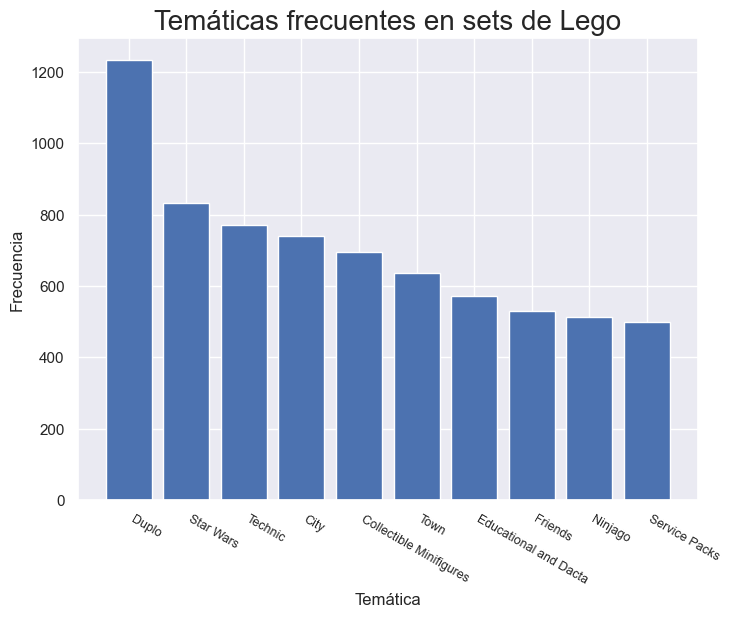

In [21]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [22]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]

En los siguientes puntos se hace una evaluación de las cantidades de partes y los temas principales. 

In [23]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

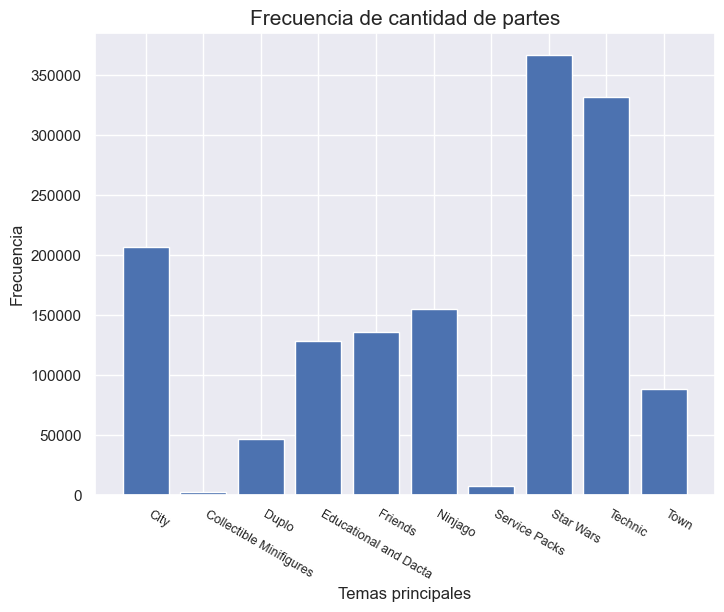

In [24]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

Del diagrama de frecuencia anterior observamos que 'Collectible Minifigures' (serie de elementos que son para coleccionar) y 'Services pack' (repuestos de piezas) no cuentan con una alta representación dentro del conjunto de *sets* considerados. Luego, se hace un nuevo análisis descartando estos dos features.

In [25]:
grouped_df = grouped_df[~grouped_df['themes_parent_name'].isin(['Collectible Minifigures','Service Packs'])]

In [26]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]

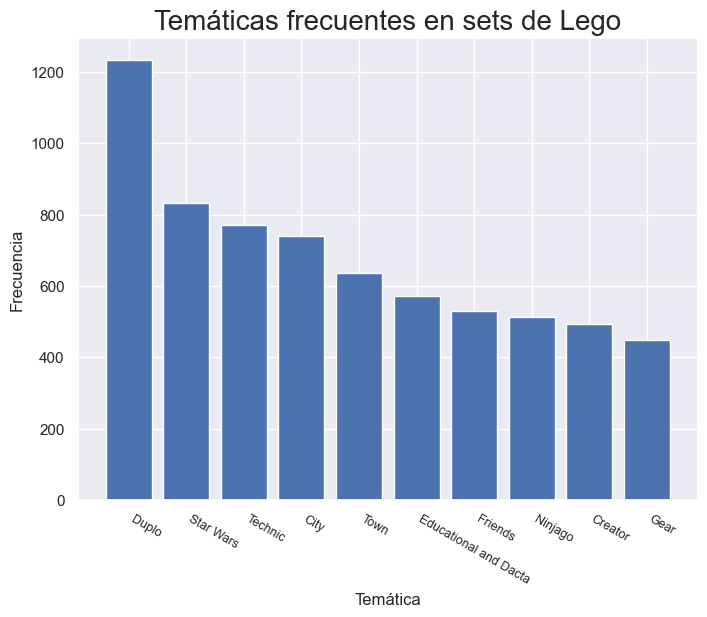

In [27]:
#Evaluamos las temáticas más frecuents al descartar Collectible Minifigues y Services  packs.
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [28]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

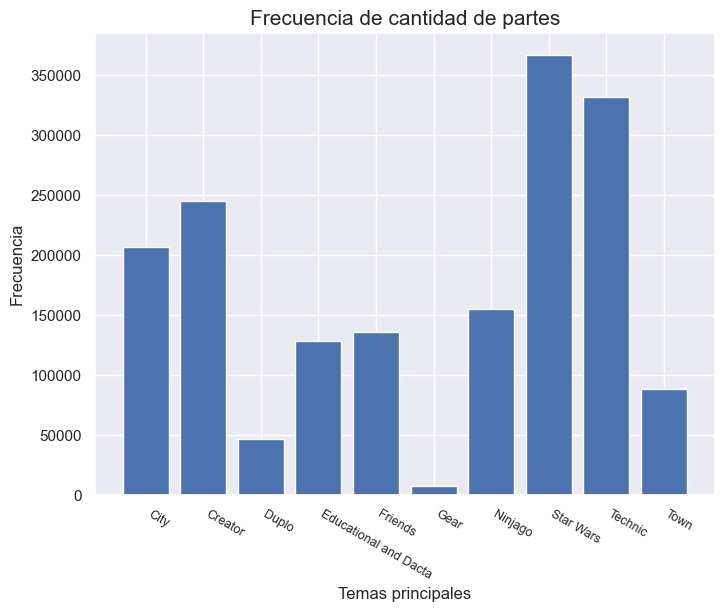

In [29]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

Vemos que el feature 'Gear' no cuenta con alta representación dentro de los diez primeros features evaluados. Además, estos sets corresponden a piezas de accesorios (por ejemplo, llaveros). Por este último motivo, se decide descartar el tema 'Gear' del dataset final.

In [30]:
grouped_df = grouped_df[~grouped_df['themes_parent_name'].isin(['Gear'])]

In [31]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]

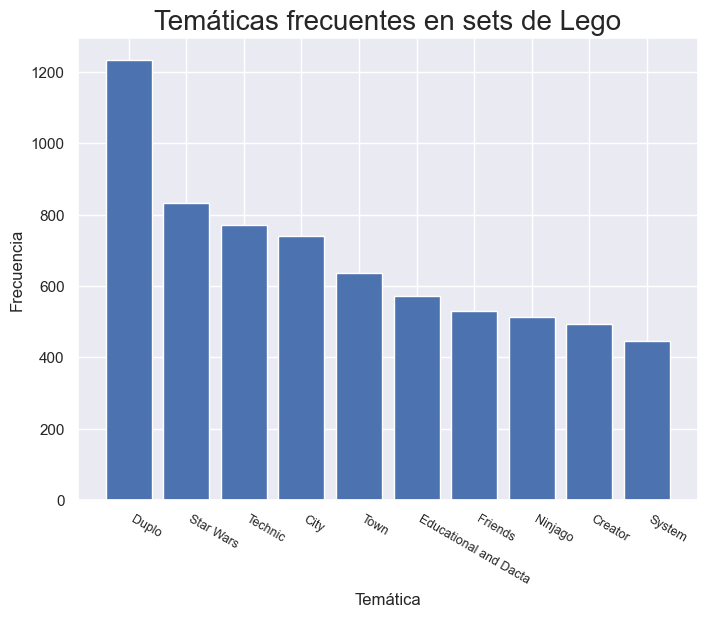

In [32]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [33]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

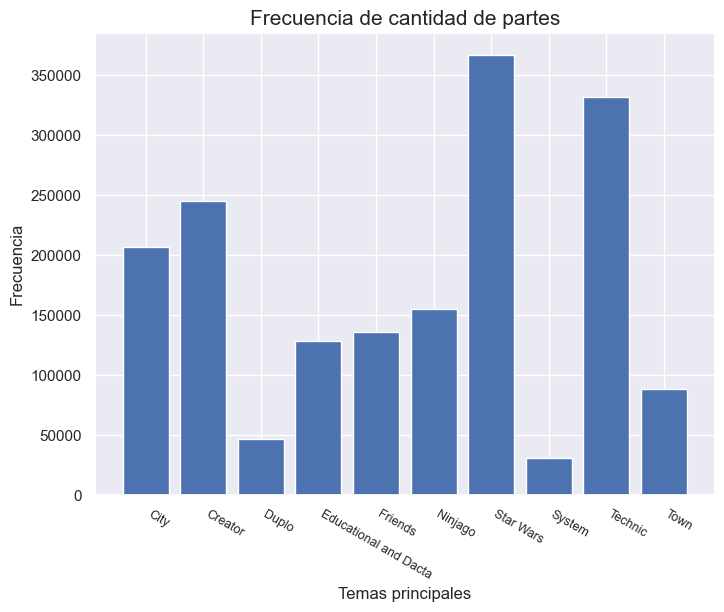

In [34]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Frecuencia de cantidad de partes", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

Se decide descartar 'System', ya que dejó de fabricarse en los 70s.

In [35]:
grouped_df = grouped_df[~grouped_df['themes_parent_name'].isin(['System'])]

In [36]:
df_final = df_final_completo[df_final_completo['themes_parent_name'].isin(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index)]

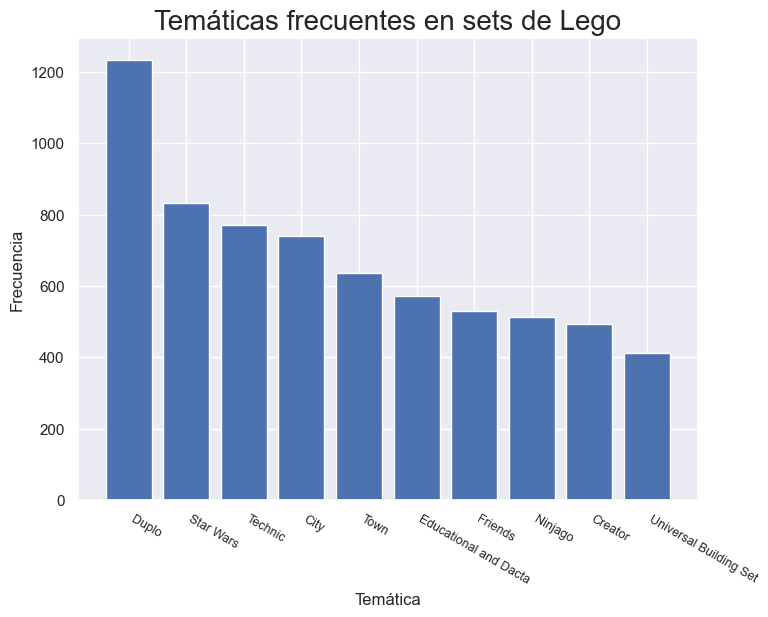

In [37]:
top_tematica = 10

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped_df['themes_parent_name'].value_counts()[:top_tematica].index, grouped_df['themes_parent_name'].value_counts()[:top_tematica])
ax.set_xlabel('Temática')
ax.set_ylabel('Frecuencia')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
ax.set_title("Temáticas frecuentes en sets de Lego", fontsize = 20)
plt.show()

In [38]:
df_qp = df_final[['quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby('themes_parent_name').sum().reset_index()
aggregated_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

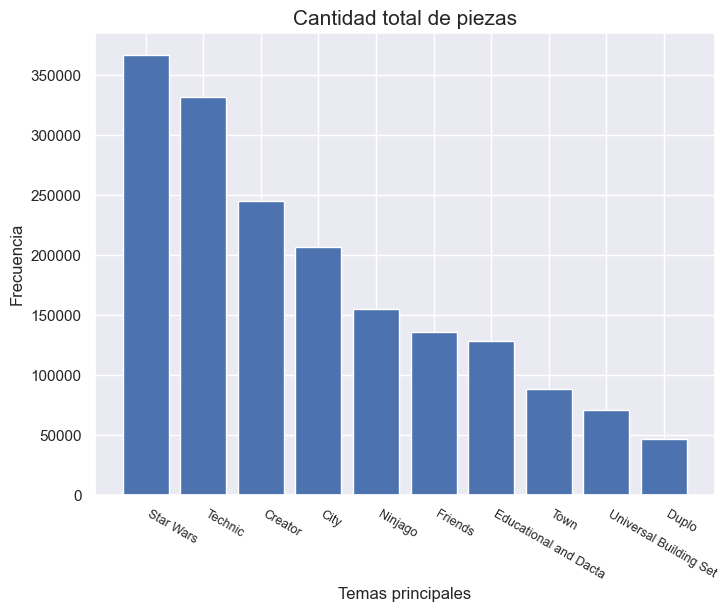

In [39]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(aggregated_df_qp['themes_parent_name'][:top_theme], aggregated_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Cantidad total de piezas", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [40]:
aggregated_df_qp = group_df_qp.groupby('themes_parent_name').mean().reset_index().sort_values('quantity_part', ascending=False)
aggregated_df_qp

,themes_parent_name,quantity_part
6,Star Wars,366419.0
7,Technic,330910.0
1,Creator,244315.0
0,City,206089.0
5,Ninjago,155121.0
4,Friends,135667.0
3,Educational and Dacta,128536.0
8,Town,88096.0
9,Universal Building Set,70651.0
2,Duplo,46434.0


In [41]:
df_qp = df_final[['set_num', 'quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby(['set_num', 'themes_parent_name']).sum().reset_index()
group_df_qp = group_df_qp[['quantity_part', 'themes_parent_name']]
group_df_qp = group_df_qp.groupby(['themes_parent_name']).mean().reset_index()
group_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

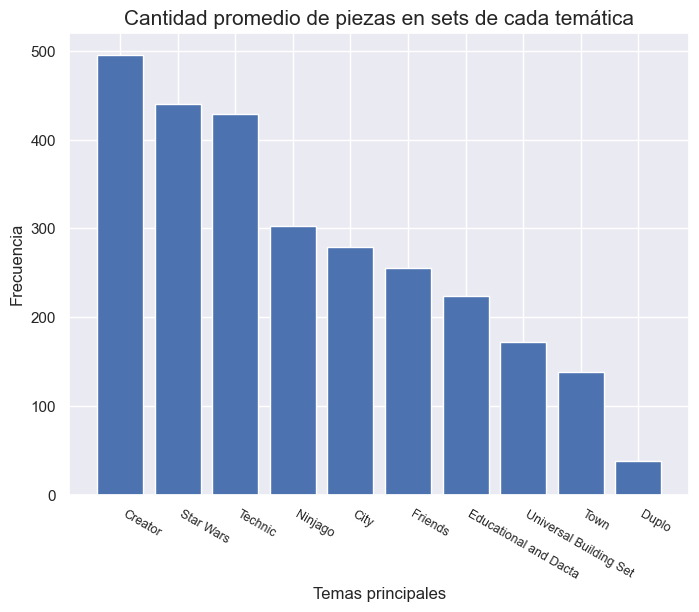

In [42]:
top_theme= 10
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['themes_parent_name'][:top_theme], group_df_qp['quantity_part'][:top_theme])
ax.set_xlabel('Temas principales')
ax.set_ylabel('Frecuencia')
ax.set_title("Cantidad promedio de piezas en sets de cada temática", fontsize = 15)
#ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [43]:
#Dejamos solo las variables que nos interesan y eliminamos el resto
df_final = df_final.drop(columns=['id','version','color_id', 'is_spare', 'name', 'part_cat_id'])
# Agregar un numeral a los rgb para graficarlos
df_final['rgb'] = df_final['rgb'].apply(lambda x : '#'+x)
df_final

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories
...,...,...,...,...,...,...,...
1083478,10997-1,Duplo,102287pr0001,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1083479,10997-1,Duplo,102287pr0002,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1083480,10997-1,Duplo,102287pr0003,1,#EBD800,Plastic,"Non-Buildable Figures (Duplo, Fabuland, etc)"
1083481,10997-1,Duplo,3437pr0175,1,#FCFCFC,Plastic,"Duplo, Quatro and Primo"


### 4.2 Análisis exploratorio

A continuación se hace un análisis de las variables que componen el dataset **df_final**

### 4.3 Tipos de variables 

In [50]:
# Obtener los nombres de las columnas categóricas
cat_cols = df_final.select_dtypes(include='object').columns
print("Variables categóricas en el dataset:")
for col in cat_cols:
    print(col)

Variables categóricas en el dataset:
set_num
themes_parent_name
part_num
rgb
part_material
cat_name


Donde todas las variables descriptas anteriormente son del tipo nominal.

In [51]:
# Obtener los nombres de las columnas numéricas
num_cols = df_final.select_dtypes(include='number').columns
print("Variables numéricas en el dataset:")
for col in num_cols:
    print(col)

Variables numéricas en el dataset:
quantity_part


En forma resumida, las variables encontradas en el dataset son:

**Categóricas**
* set_num
* themes_parent_name
* part_num
* rgb
* part_material
* cat_name

**Numéricas**
* quantity_part

In [52]:
# Separar las variables numéricas y categóricas
num_data = df_final.loc[:, ["quantity_part"]]
cat_data = df_final.drop(['quantity_part'], axis=1)

In [53]:
# Resumen de 5 números de var numerica
resumen = num_data.describe()
print(resumen)

       quantity_part
count  507924.000000
mean        3.489179
std         8.619631
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       724.000000


In [54]:
print(aggregated_df_qp)

       themes_parent_name  quantity_part
6               Star Wars       366419.0
7                 Technic       330910.0
1                 Creator       244315.0
0                    City       206089.0
5                 Ninjago       155121.0
4                 Friends       135667.0
3   Educational and Dacta       128536.0
8                    Town        88096.0
9  Universal Building Set        70651.0
2                   Duplo        46434.0


In [55]:
# Verificar si hay valores faltantes
missing_values_count = df_final.isnull().sum()
non_zero_missing_num = missing_values_count[missing_values_count != 0]

print("Variables con missing values:")
if non_zero_missing_num.empty:
    print("0")
else:
    for variable, count in non_zero_missing_num.items():
        print(f"{variable}: {count}")

Variables con missing values:
0


In [56]:
# Exploraración de las variables categóricas
for col in cat_data:
    print(f"Classes in {col}:")
    print(df_final[col].value_counts())
    print('\n')

Classes in set_num:
set_num
71741-1           2618
71799-1           1445
10265-1           1176
70620-1           1013
71705-1            998
                  ... 
tech007promo-1       1
fruit8-1             1
970634-1             1
9898-1               1
970606-1             1
Name: count, Length: 6733, dtype: int64


Classes in themes_parent_name:
themes_parent_name
Star Wars                 91588
City                      87342
Friends                   62671
Creator                   57321
Technic                   53875
Ninjago                   52159
Town                      38123
Educational and Dacta     26252
Duplo                     24181
Universal Building Set    14412
Name: count, dtype: int64


Classes in part_num:
part_num
6141           13654
3023            8897
54200           6867
3024            6505
3710            5972
               ...  
3297pr0003         1
170872             1
31110pr0067        1
31110pr0065        1
76371pr0216        1
Name: count, Lengt

### 4.4 Análisis de piezas en cada temática

In [67]:
df_qp = df_final[['set_num', 'quantity_part', 'themes_parent_name']]
group_df_qp = df_qp.groupby(['set_num', 'themes_parent_name']).sum().reset_index()
distribution_metrics = group_df_qp.groupby('themes_parent_name')['quantity_part'].agg(['min', 'max', 'mean', 'median','std','var'])
print(distribution_metrics)

                        min    max        mean  median         std   
themes_parent_name                                                   
City                      1   2984  278.875507   169.0  349.864973  \
Creator                   1   8684  495.567951   206.0  895.801976   
Duplo                     1    773   37.628849    25.0   44.209466   
Educational and Dacta     1   4900  224.321117    84.0  444.257326   
Friends                   1   3274  255.975472   140.0  338.281844   
Ninjago                   1  11626  302.970703    63.5  741.905101   
Star Wars                 1   7663  440.407452   176.0  811.326974   
Technic                   1   8268  428.639896   123.5  845.072290   
Town                      2   2122  138.298273    70.0  198.421401   
Universal Building Set    1   1201  171.900243    53.0  235.131789   

                                  var  
themes_parent_name                     
City                    122405.499386  
Creator                 802461.180841  

### 4.5 Análisis de colores más comunes y materiales

In [68]:
print(f"Hay {df_final['part_material'].nunique()} materiales distintos en el dataset")

Hay 5 materiales distintos en el dataset


In [69]:
print(f"Hay {df_final['rgb'].nunique()} colores distintos en el dataset")

Hay 129 colores distintos en el dataset


In [134]:
# Vemos cuántas observaciones (tipo de pieza) de cada color hay en los datos
subset_df = df_final[['quantity_part', 'rgb']]
aggregated_df = subset_df.groupby('rgb').count().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,rgb,quantity_part
5,#05131D,89117
128,#FFFFFF,62861
58,#A0A5A9,61973
84,#C91A09,46156
34,#6C6E68,43038
108,#F2CD37,31103
1,#0055BF,22244
102,#E4CD9E,13853
55,#9BA19D,13370
24,#582A12,12920


In [135]:
# Vemos cuántas piezas de cada color hay en los datos
subset_df = df_final[['quantity_part', 'rgb']]
aggregated_df = subset_df.groupby('rgb').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,rgb,quantity_part
5,#05131D,344374
58,#A0A5A9,231552
128,#FFFFFF,205490
34,#6C6E68,155304
84,#C91A09,155257
1,#0055BF,107822
108,#F2CD37,100568
102,#E4CD9E,55689
55,#9BA19D,53924
24,#582A12,42152


In [146]:
df_qp = df_final[['set_num', 'quantity_part', 'rgb']]
group_df_qp = df_qp.groupby(['set_num', 'rgb']).sum().reset_index()
distribution_metrics = group_df_qp.groupby('rgb')['quantity_part'].agg(['min', 'max', 'mean', 'median','std','var'])
print(distribution_metrics)

         min   max       mean  median         std           var
rgb                                                            
#0020A0    1   117   7.180693     3.0   11.455296    131.223815
#0055BF    1  1266  29.212138     9.0   69.386485   4814.484254
#0059A3    1     1   1.000000     1.0    0.000000      0.000000
#008F9B    1   348  16.971014     7.0   30.783217    947.606430
#009ECE    1     2   1.200000     1.0    0.447214      0.200000
...      ...   ...        ...     ...         ...           ...
#FFA70B    1    16   3.632653     2.0    4.116501     16.945578
#FFCB78    1     1   1.000000     1.0         NaN           NaN
#FFF03A    1   764   9.885714     3.0   44.363434   1968.114286
#FFF230    5     5   5.000000     5.0         NaN           NaN
#FFFFFF    1  3548  47.195682    14.0  121.756808  14824.720257

[129 rows x 6 columns]


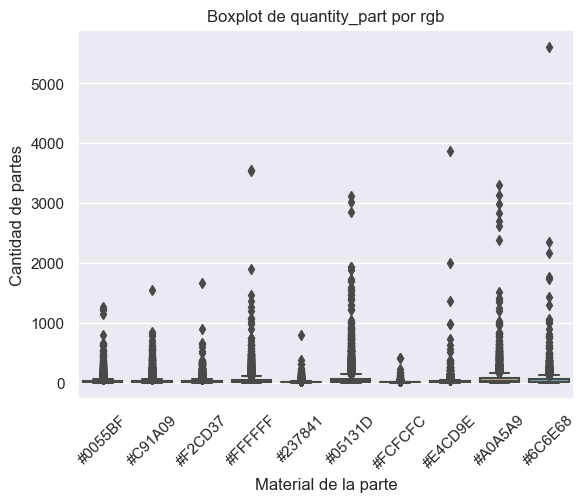

In [147]:
top_colores = 10
colores_grafico = group_df_qp['rgb'].value_counts()[:top_colores].index
df_filtered = group_df_qp[group_df_qp['rgb'].isin(colores_grafico)]
# Crear el boxplot utilizando seaborn
sns.boxplot(x="rgb", y="quantity_part", data=df_filtered)
plt.title("Boxplot de quantity_part por rgb")
plt.xlabel("Material de la parte")
plt.ylabel("Cantidad de partes")
plt.xticks(rotation=45) 
plt.show()

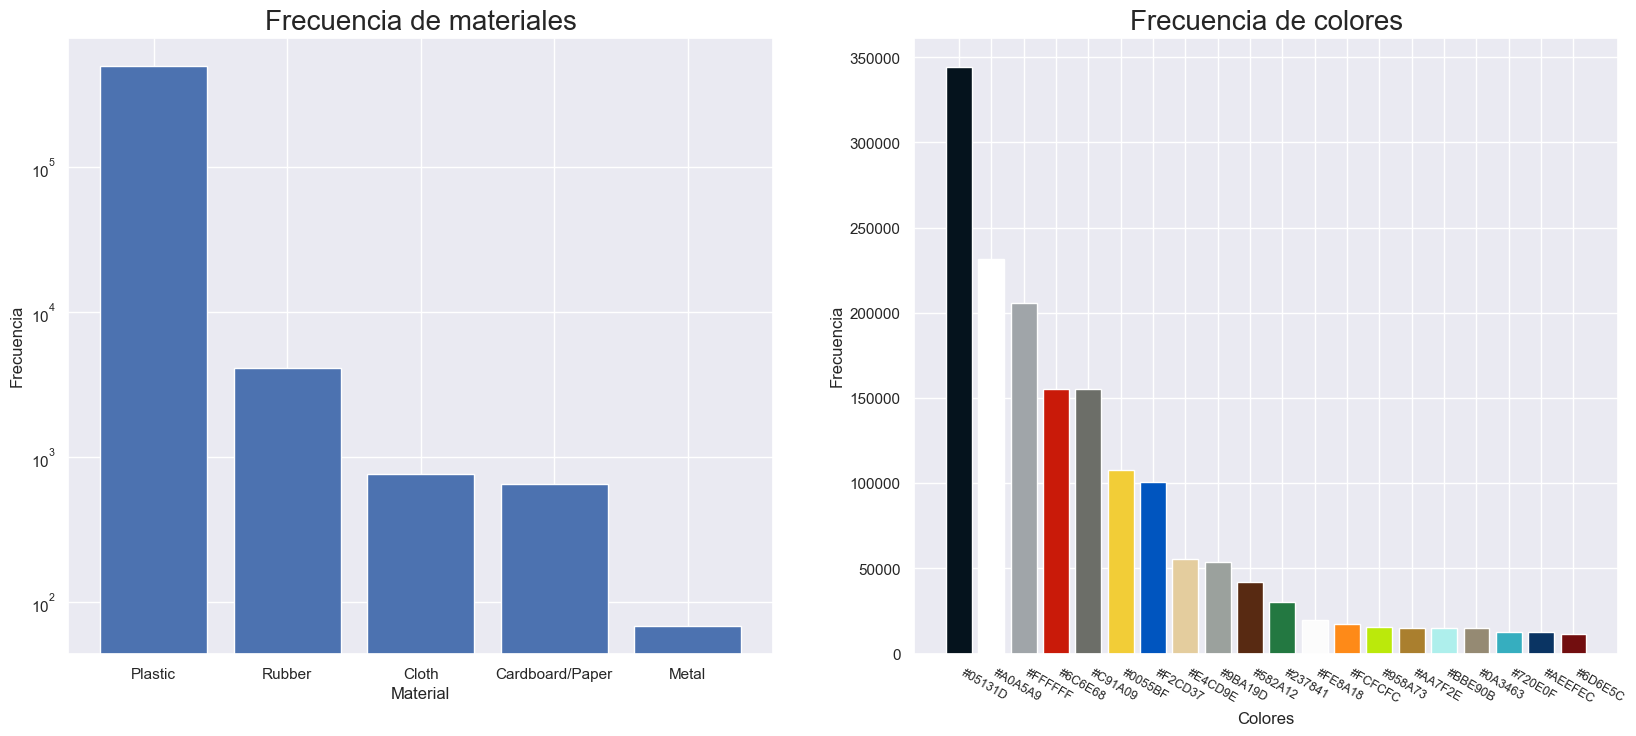

In [55]:
top_colores = 20
colores_grafico = df_final['rgb'].value_counts()[:top_colores].index

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].bar(df_final['part_material'].value_counts().index, df_final['part_material'].value_counts())
ax[0].set_xlabel('Material')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title("Frecuencia de materiales", fontsize = 20)
ax[0].set_yscale('log')

ax[1].bar(aggregated_df['rgb'][:top_colores], aggregated_df['quantity_part'][:top_colores], color=colores_grafico)
ax[1].set_xlabel('Colores')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title("Frecuencia de colores", fontsize = 20)

plt.setp(ax[1].get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [128]:
# Vemos cuántas tipos de piezas de cada material hay en los datos
subset_df = df_final[['quantity_part', 'part_material']]
aggregated_df = subset_df.groupby('part_material').count().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,part_material,quantity_part
3,Plastic,502310
4,Rubber,4127
1,Cloth,761
0,Cardboard/Paper,657
2,Metal,69


In [129]:
# Vemos cuántas piezas de cada material hay en los datos
subset_df = df_final[['quantity_part', 'part_material']]
aggregated_df = subset_df.groupby('part_material').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,part_material,quantity_part
3,Plastic,1753019
4,Rubber,17325
1,Cloth,963
0,Cardboard/Paper,666
2,Metal,265


In [148]:
df_qp = df_final[['set_num', 'quantity_part', 'part_material']]
group_df_qp = df_qp.groupby(['set_num', 'part_material']).sum().reset_index()
distribution_metrics = group_df_qp.groupby('part_material')['quantity_part'].agg(['min', 'max', 'mean', 'median','std','var'])
print(distribution_metrics)

                 min    max        mean  median         std            var
part_material                                                             
Cardboard/Paper    1     21    3.805714     2.0    3.767217      14.191921
Cloth              1     40    1.929860     1.0    2.673890       7.149689
Metal              1     24    4.907407     2.0    6.032205      36.387491
Plastic            1  11622  261.137941    76.0  575.815164  331563.102543
Rubber             1    144    7.316301     4.0    8.457506      71.529400


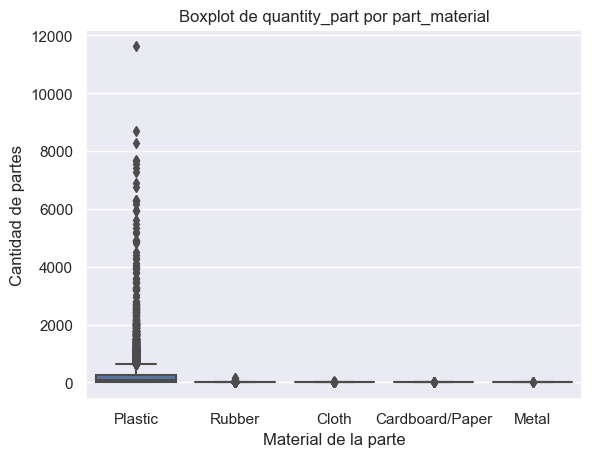

In [149]:
# Crear el boxplot utilizando seaborn
sns.boxplot(x="part_material", y="quantity_part", data=group_df_qp)
plt.title("Boxplot de quantity_part por part_material")
plt.xlabel("Material de la parte")
plt.ylabel("Cantidad de partes")
plt.show()

A continuación se analizan los colores en cada temática

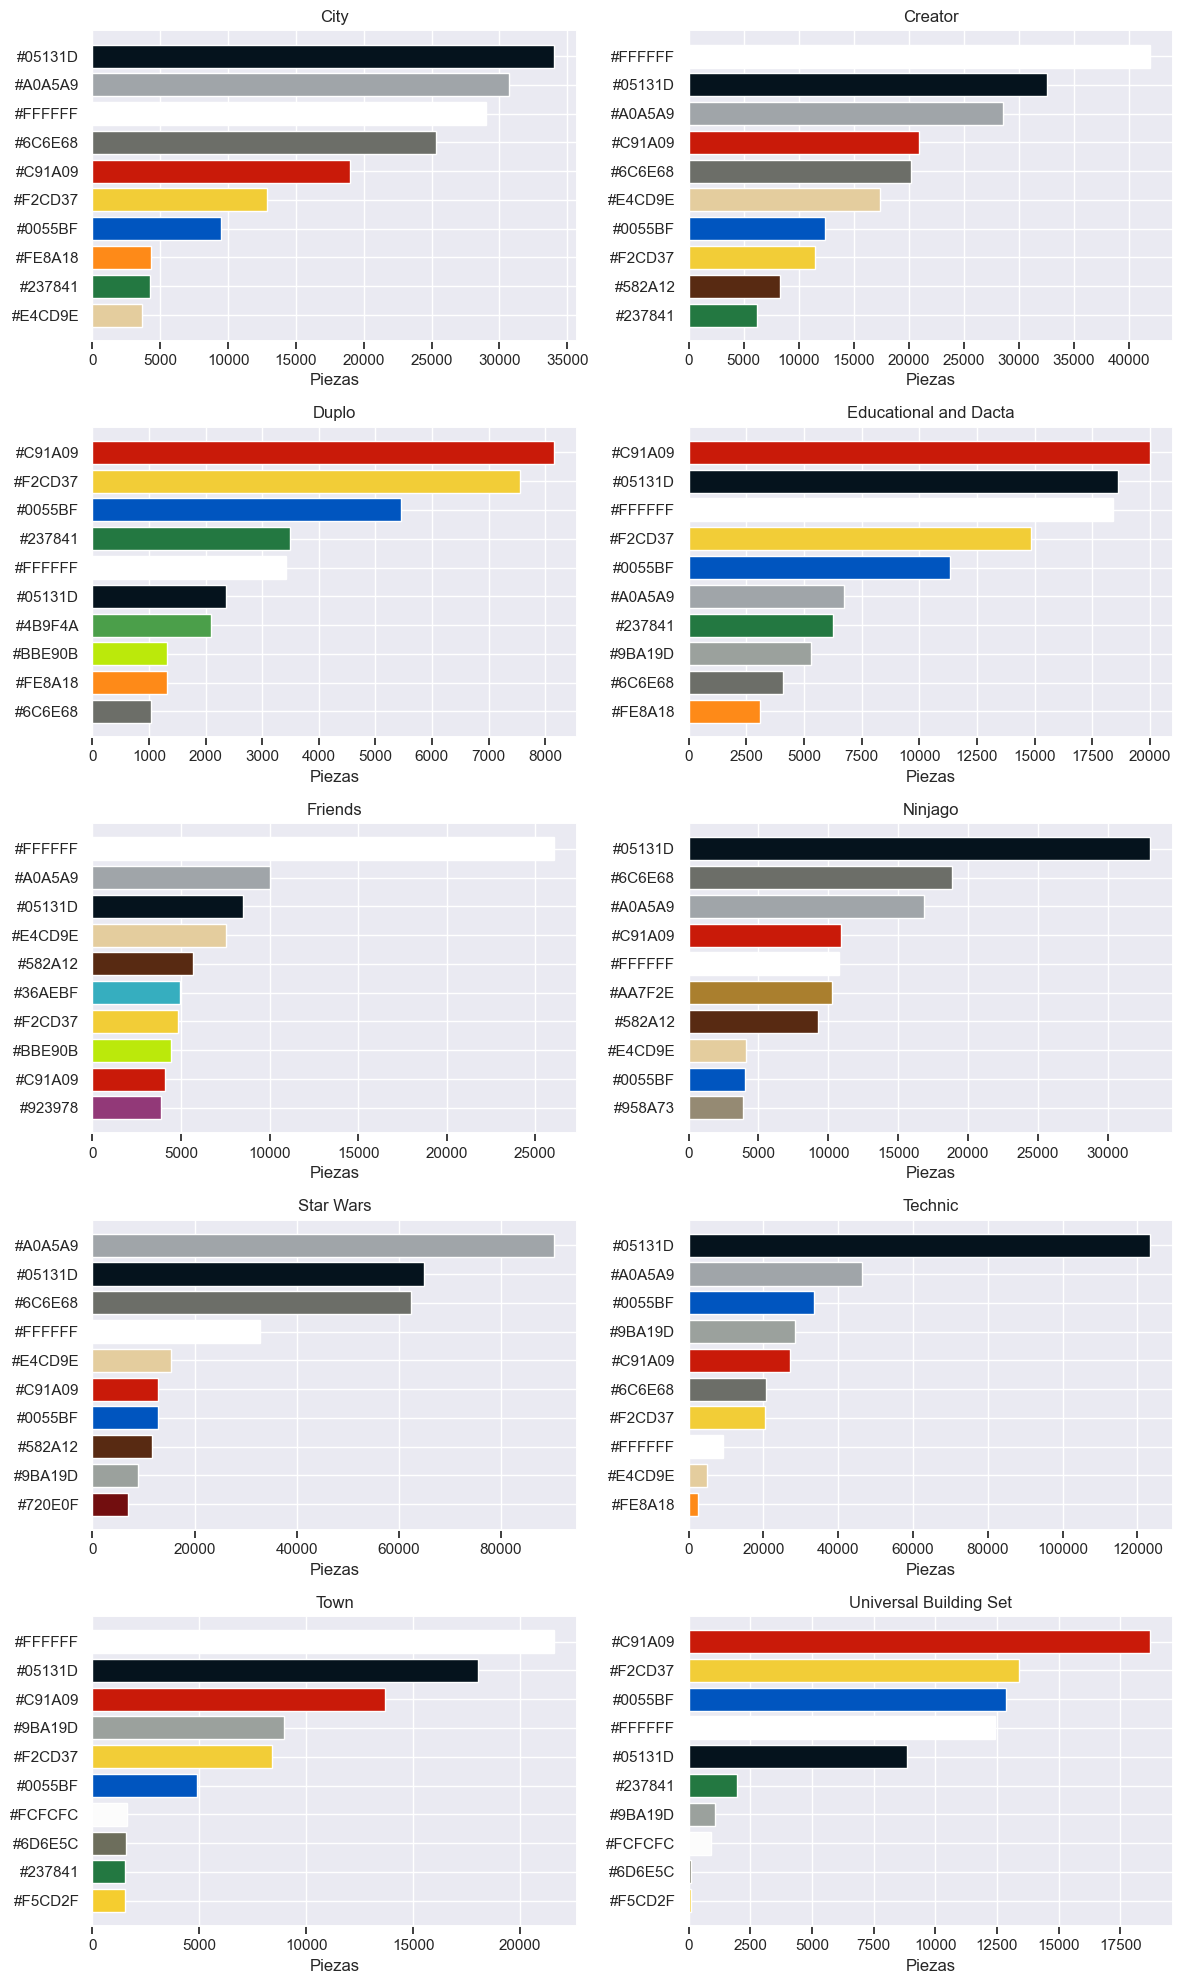

In [56]:
# Elegir cuántos colores visualizar
top_colors = 10

# Agrupar y sumar piezas de cada color dentro de cada tema y quedarse con los colores con más piezas 
theme_color_counts = df_final.groupby(['themes_parent_name', 'rgb'])['quantity_part'].sum().reset_index()
top_10_colors = theme_color_counts.groupby('themes_parent_name').apply(lambda x: x.nlargest(top_colors, 'quantity_part')).reset_index(drop=True)

# Extraer los nombres de las temáticas y RGB únicos
grouped_data = top_10_colors.groupby('themes_parent_name')
theme_names = list(grouped_data.groups.keys())

top_10_rgb_codes = {}
for theme_name, group in grouped_data:
    sorted_data = group.sort_values(by='quantity_part', ascending=False)
    top_10_data = sorted_data.head(10)
    top_10_rgb_codes[theme_name] = top_10_data['rgb'].tolist()

# Bar charts
num_charts = len(theme_names)
num_cols = 2
num_rows = (num_charts + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows), sharex=False)

for i, theme_name in enumerate(theme_names):
    row = i // num_cols
    col = i % num_cols

    theme_rgb_codes = top_10_rgb_codes[theme_name]
    group = grouped_data.get_group(theme_name)
    frequencies = group.loc[group['rgb'].isin(theme_rgb_codes), 'quantity_part']
    colors = group.loc[group['rgb'].isin(theme_rgb_codes), 'rgb']

    y_pos = np.arange(len(frequencies))
    axs[row, col].barh(y_pos, frequencies, align='center', color=colors)
    axs[row, col].set_yticks(y_pos)
    axs[row, col].set_yticklabels(colors)
    axs[row, col].invert_yaxis()
    axs[row, col].set_xlabel('Piezas')
    axs[row, col].set_title(theme_name)

    # Create a twin Axes object for separate x-axis scale
    axs_twin = axs[row, col].twiny()

    # Adjust x-axis limits
    max_frequency = max(frequencies)
    axs_twin.set_xlim([0, max_frequency * 1.1])  # Add a buffer of 10% to the maximum frequency for better visibility

    # Remove ticks and labels from the twin Axes
    axs_twin.set_xticks([])
    axs_twin.set_xticklabels([])

# Hide unused subplots
if num_charts < num_rows * num_cols:
    for i in range(num_charts, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()

### 4.5 Análisis de categorías de piezas

In [76]:
print(f"Hay {df_final['cat_name'].nunique()} nombres de categorías de piezas distintas en el dataset")

Hay 63 nombres de categorías de piezas distintas en el dataset


In [77]:
subset_df = df_final[['quantity_part', 'cat_name']]
aggregated_df = subset_df.groupby('cat_name').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
print(aggregated_df)

               cat_name  quantity_part
32               Plates         255157
3                Bricks         208959
50         Technic Pins         144221
35       Plates Special         117032
6         Bricks Sloped          97087
..                  ...            ...
29                Other             21
18       Minidoll Heads             14
13             HO Scale              6
20  Minidoll Upper Body              6
19  Minidoll Lower Body              3

[63 rows x 2 columns]


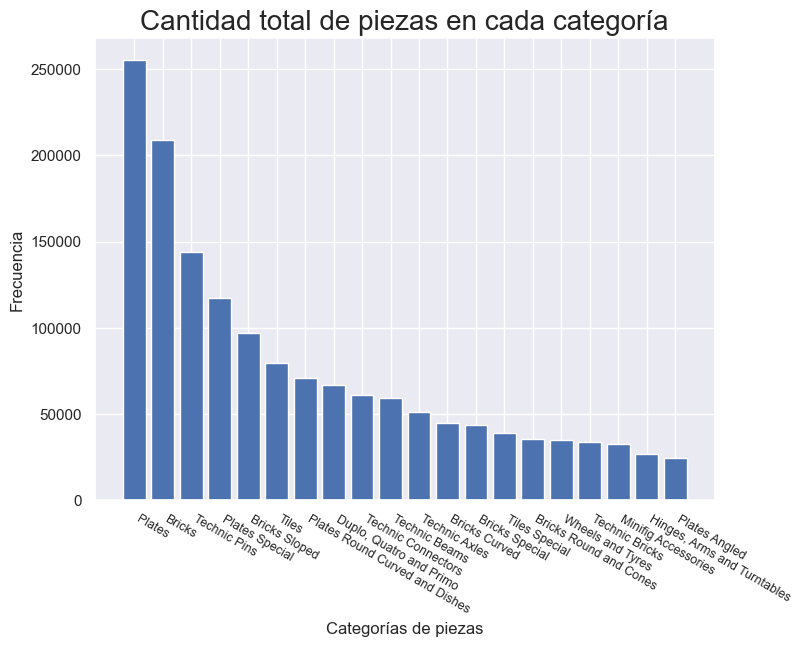

In [62]:
top_cat = 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(aggregated_df['cat_name'][:top_cat], aggregated_df['quantity_part'][:top_cat])
ax.set_xlabel('Categorías de piezas')
ax.set_ylabel('Frecuencia')
ax.set_title("Cantidad total de piezas en cada categoría", fontsize = 20)
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [78]:
df_qp = df_final[['set_num', 'quantity_part', 'cat_name']]
group_df_qp = df_qp.groupby(['set_num', 'cat_name']).sum().reset_index()
group_df_qp = group_df_qp[['quantity_part', 'cat_name']]
group_df_qp = group_df_qp.groupby(['cat_name']).mean().reset_index()
group_df_qp = group_df_qp.sort_values('quantity_part', ascending=False)

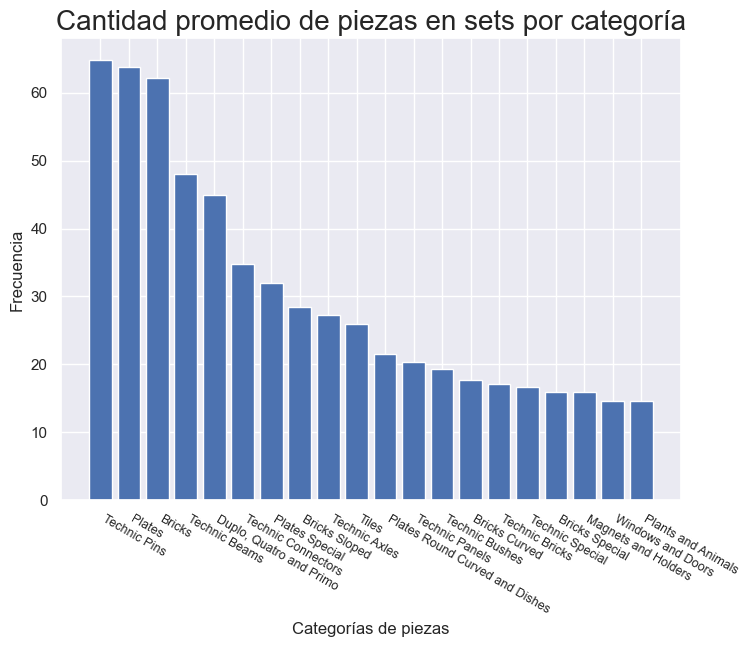

In [79]:
top_cat = 20

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(group_df_qp['cat_name'][:top_cat], group_df_qp['quantity_part'][:top_cat])
ax.set_xlabel('Categorías de piezas')
ax.set_ylabel('Frecuencia')
ax.set_title("Cantidad promedio de piezas en sets por categoría", fontsize = 20)
plt.setp(ax.get_xticklabels(), fontsize=9, rotation=330, ha='left')
plt.show()

In [150]:
df_qp = df_final[['set_num', 'quantity_part', 'cat_name']]
group_df_qp = df_qp.groupby(['set_num', 'cat_name']).sum().reset_index()
distribution_metrics = group_df_qp.groupby('cat_name')['quantity_part'].agg(['min', 'max', 'mean', 'median','std','var'])
print(distribution_metrics)

                              min   max       mean  median         std   
cat_name                                                                 
Bars, Ladders and Fences        1   512   8.845029     4.0   18.751900  \
Baseplates                      1    50   2.572603     2.0    4.126211   
Belville, Scala and Fabuland    1     4   1.529412     1.0    0.874475   
Bricks                          1  2100  62.134701    13.0  154.603577   
Bricks Curved                   1   409  17.693307     8.0   29.110768   
...                           ...   ...        ...     ...         ...   
Transportation - Sea and Air    1   100   3.998967     3.0    4.709009   
Tubes and Hoses                 1   338   6.690391     3.0   19.248082   
Wheels and Tyres                1   288  13.466435     8.0   15.994561   
Windows and Doors               1   336  14.574919     7.0   23.001295   
Windscreens and Fuselage        1    28   2.370936     2.0    2.419164   

                                     

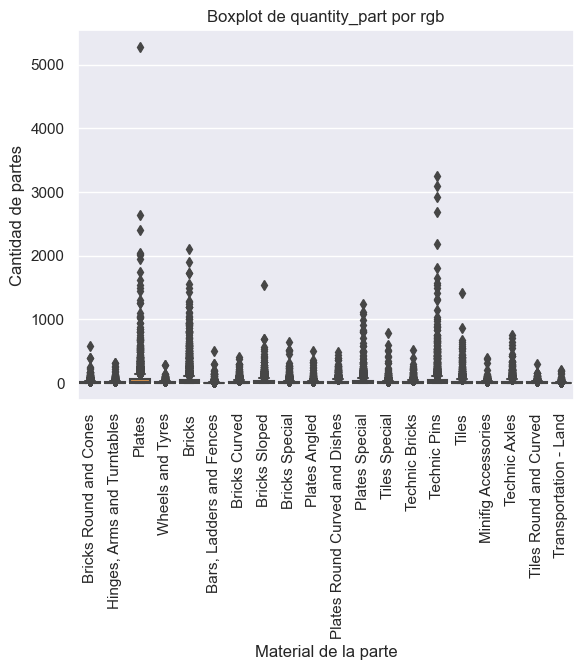

In [153]:
top_cat = 20
colores_grafico = group_df_qp['cat_name'].value_counts()[:top_cat].index
df_filtered = group_df_qp[group_df_qp['cat_name'].isin(colores_grafico)]
# Crear el boxplot utilizando seaborn
sns.boxplot(x="cat_name", y="quantity_part", data=df_filtered)
plt.title("Boxplot de quantity_part por rgb")
plt.xlabel("Material de la parte")
plt.ylabel("Cantidad de partes")
plt.xticks(rotation=90) 
plt.show()

### 4.6 Preparación de features

In [80]:
df_final_modelo = df_final.copy()

In [81]:
subset_df = df_final[['quantity_part', 'rgb']]
aggregated_df = subset_df.groupby('rgb').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,rgb,quantity_part
5,#05131D,344374
58,#A0A5A9,231552
128,#FFFFFF,205490
34,#6C6E68,155304
84,#C91A09,155257
1,#0055BF,107822
108,#F2CD37,100568
102,#E4CD9E,55689
55,#9BA19D,53924
24,#582A12,42152


In [82]:
# Creo dummies para colores comunes
colores = {
    'negro': '#05131D',
    'gris': '#A0A5A9',
    'blanco': '#FFFFFF',
    'gris_2': '#6C6E68',
    'rojo': '#C91A09',
    'azul': '#0055BF',
    'amarillo': '#F2CD37',
    'beige': '#E4CD9E',
    'gris_3': '#9BA19D',
    'marron': '#582A12'
}

# Contar cuántas piezas hay en cada observación para cada uno de los colores más comunes
for variable_name, colores in colores.items():
    df_final_modelo[variable_name] = np.where(df_final_modelo['rgb'] == colores, 1, 0) * df_final_modelo['quantity_part']

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,gris_2,rojo,azul,amarillo,beige,gris_3,marron
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,4,0
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,0,0,0,1,0,0,0
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,0,0,0,0,0,0,0


In [83]:
# Contar cuántas piezas de cada material hay en cada observación
dummy_variables = pd.get_dummies(df_final_modelo['part_material'], dtype=int)
dummy_variables = dummy_variables.mul(df_final_modelo['quantity_part'], axis=0)
df_final_modelo = pd.concat([df_final_modelo, dummy_variables], axis=1)
df_final_modelo

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,...,azul,amarillo,beige,gris_3,marron,Cardboard/Paper,Cloth,Metal,Plastic,Rubber
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,1,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,2,0
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,...,0,0,0,4,0,0,0,0,4,0
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,...,0,1,0,0,0,0,0,0,1,0
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
# Categorías de piezas más comunes
subset_df = df_final[['quantity_part', 'cat_name']]
aggregated_df = subset_df.groupby('cat_name').sum().reset_index()
aggregated_df = aggregated_df.sort_values('quantity_part', ascending=False)
aggregated_df.head(10)

,cat_name,quantity_part
32,Plates,255157
3,Bricks,208959
50,Technic Pins,144221
35,Plates Special,117032
6,Bricks Sloped,97087
53,Tiles,79686
34,Plates Round Curved and Dishes,70941
10,"Duplo, Quatro and Primo",66620
47,Technic Connectors,61051
43,Technic Beams,59170


In [85]:
# Contar cuántas piezas de cada categoría hay en cada observación
dummy_variables = pd.get_dummies(df_final_modelo['cat_name'], dtype=int)
dummy_variables = dummy_variables.mul(df_final_modelo['quantity_part'], axis=0)
df_final_modelo = pd.concat([df_final_modelo, dummy_variables], axis=1)
df_final_modelo

df_final_modelo.head()

,set_num,themes_parent_name,part_num,quantity_part,rgb,part_material,cat_name,negro,gris,blanco,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
13,3931-1,Friends,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,41135-1,Friends,2343,2,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1821-1,Town,2343,4,#9BA19D,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,1821-1,Town,2343,1,#F2CD37,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,3040-1,Universal Building Set,2343,1,#FCFCFC,Plastic,Minifig Accessories,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Limpio el dataset de variables que no sirve agrupar
columns_to_drop = ['part_num', 'rgb','part_material','cat_name']
df_final_modelo = df_final_modelo.drop(columns=columns_to_drop)

In [87]:
# Agrupo el dataset por set_num
aggregation_dict = {'themes_parent_name': 'first'}
for column in df_final_modelo.columns:
    if column != 'themes_parent_name' and column != 'set_num':
        aggregation_dict[column] = 'sum'

df_final_modelo = df_final_modelo.groupby('set_num').agg(aggregation_dict).reset_index()
df_final_modelo

,set_num,themes_parent_name,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
0,001-1,Technic,43,0,0,17,0,13,1,4,...,0,0,0,0,0,0,0,22,0,0
1,002-1,Technic,3,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,010-2,Duplo,18,0,0,2,0,7,5,4,...,0,0,0,0,0,0,0,0,0,0
3,028-1,Duplo,7,0,0,2,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,030-2,Duplo,29,0,0,1,0,11,9,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,fruit8-1,Creator,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6729,sw117promo-1,Star Wars,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6730,tech007promo-1,Technic,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6731,tf05-1,Star Wars,35,5,14,0,7,0,0,0,...,0,1,6,0,0,0,0,0,0,0


Calculamos las proporciones de colores, materiales y categorías en cada uno de los *sets*

In [88]:
# Calcular proporciones de colores, materiales y categorias en cada set
columns_to_divide = df_final_modelo.columns.drop(['set_num', 'themes_parent_name', 'quantity_part'])
df_final_modelo[columns_to_divide] = df_final_modelo[columns_to_divide].div(df_final_modelo['quantity_part'], axis=0)

In [89]:
df_final_modelo

,set_num,themes_parent_name,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,...,Tiles,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage
0,001-1,Technic,43,0.000000,0.000000,0.395349,0.000000,0.302326,0.023256,0.093023,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.511628,0.0,0.0
1,002-1,Technic,3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,010-2,Duplo,18,0.000000,0.000000,0.111111,0.000000,0.388889,0.277778,0.222222,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,028-1,Duplo,7,0.000000,0.000000,0.285714,0.000000,0.142857,0.285714,0.142857,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,030-2,Duplo,29,0.000000,0.000000,0.034483,0.000000,0.379310,0.310345,0.275862,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,fruit8-1,Creator,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6729,sw117promo-1,Star Wars,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6730,tech007promo-1,Technic,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6731,tf05-1,Star Wars,35,0.142857,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.028571,0.171429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### 4.7 Selección de features

In [100]:
# Defino target y features
X = df_final_modelo.drop(['themes_parent_name', 'set_num'], axis=1)
y = df_final_modelo['themes_parent_name']

In [101]:
# Label encoder para el target que tiene 10 categorías
le = LabelEncoder()
y_encoded =  le.fit_transform(y)

In [102]:
y_encoded = pd.DataFrame(y_encoded)
df_encoded = pd.concat([X, y_encoded], axis=1)
df_encoded

,quantity_part,negro,gris,blanco,gris_2,rojo,azul,amarillo,beige,gris_3,...,Tiles Round and Curved,Tiles Special,Tools,Transportation - Land,Transportation - Sea and Air,Tubes and Hoses,Wheels and Tyres,Windows and Doors,Windscreens and Fuselage,0
0,43,0.000000,0.000000,0.395349,0.000000,0.302326,0.023256,0.093023,0.000000,0.186047,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.511628,0.0,0.0,7
1,3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,7
2,18,0.000000,0.000000,0.111111,0.000000,0.388889,0.277778,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
3,7,0.000000,0.000000,0.285714,0.000000,0.142857,0.285714,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
4,29,0.000000,0.000000,0.034483,0.000000,0.379310,0.310345,0.275862,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
6729,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6
6730,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,7
6731,35,0.142857,0.400000,0.000000,0.200000,0.000000,0.000000,0.000000,0.114286,0.000000,...,0.028571,0.171429,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,6


In [103]:
#Exportamos df_enconded to csv
df_encoded.to_csv("df_encoded.csv", index= False, header = True, index_label=None)
print("Exported to CSV")

Exported to CSV


In [94]:
# Reducción de  la cantidad de features al seleccionar las 20 variables más importantes basado en feature_importance de Random Forest
y_rf = np.ravel(y_encoded)
model = RandomForestClassifier(random_state=42)
model.fit(X, y_rf)
# Obtengo la importancia de las características
feature_importances = model.feature_importances_
# Combino las variables indep y sus importancias en un df
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# Ordeno el df por importancia descendente
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
# Selecciono las 20 variables más importantes
top_features = feature_importances_df.head(20)['Feature'].tolist()
top_features

['Duplo, Quatro and Primo',
 'quantity_part',
 'Minifig Accessories',
 'Transportation - Land',
 'gris',
 'gris_2',
 'Plates',
 'rojo',
 'Bricks',
 'negro',
 'gris_3',
 'amarillo',
 'blanco',
 'Plates Special',
 'Plants and Animals',
 'Non-Buildable Figures (Duplo, Fabuland, etc)',
 'Wheels and Tyres',
 'Plastic',
 'azul',
 'Bricks Sloped']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=1)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (4511, 79) (4511, 1)
Test: (2222, 79) (2222, 1)


c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


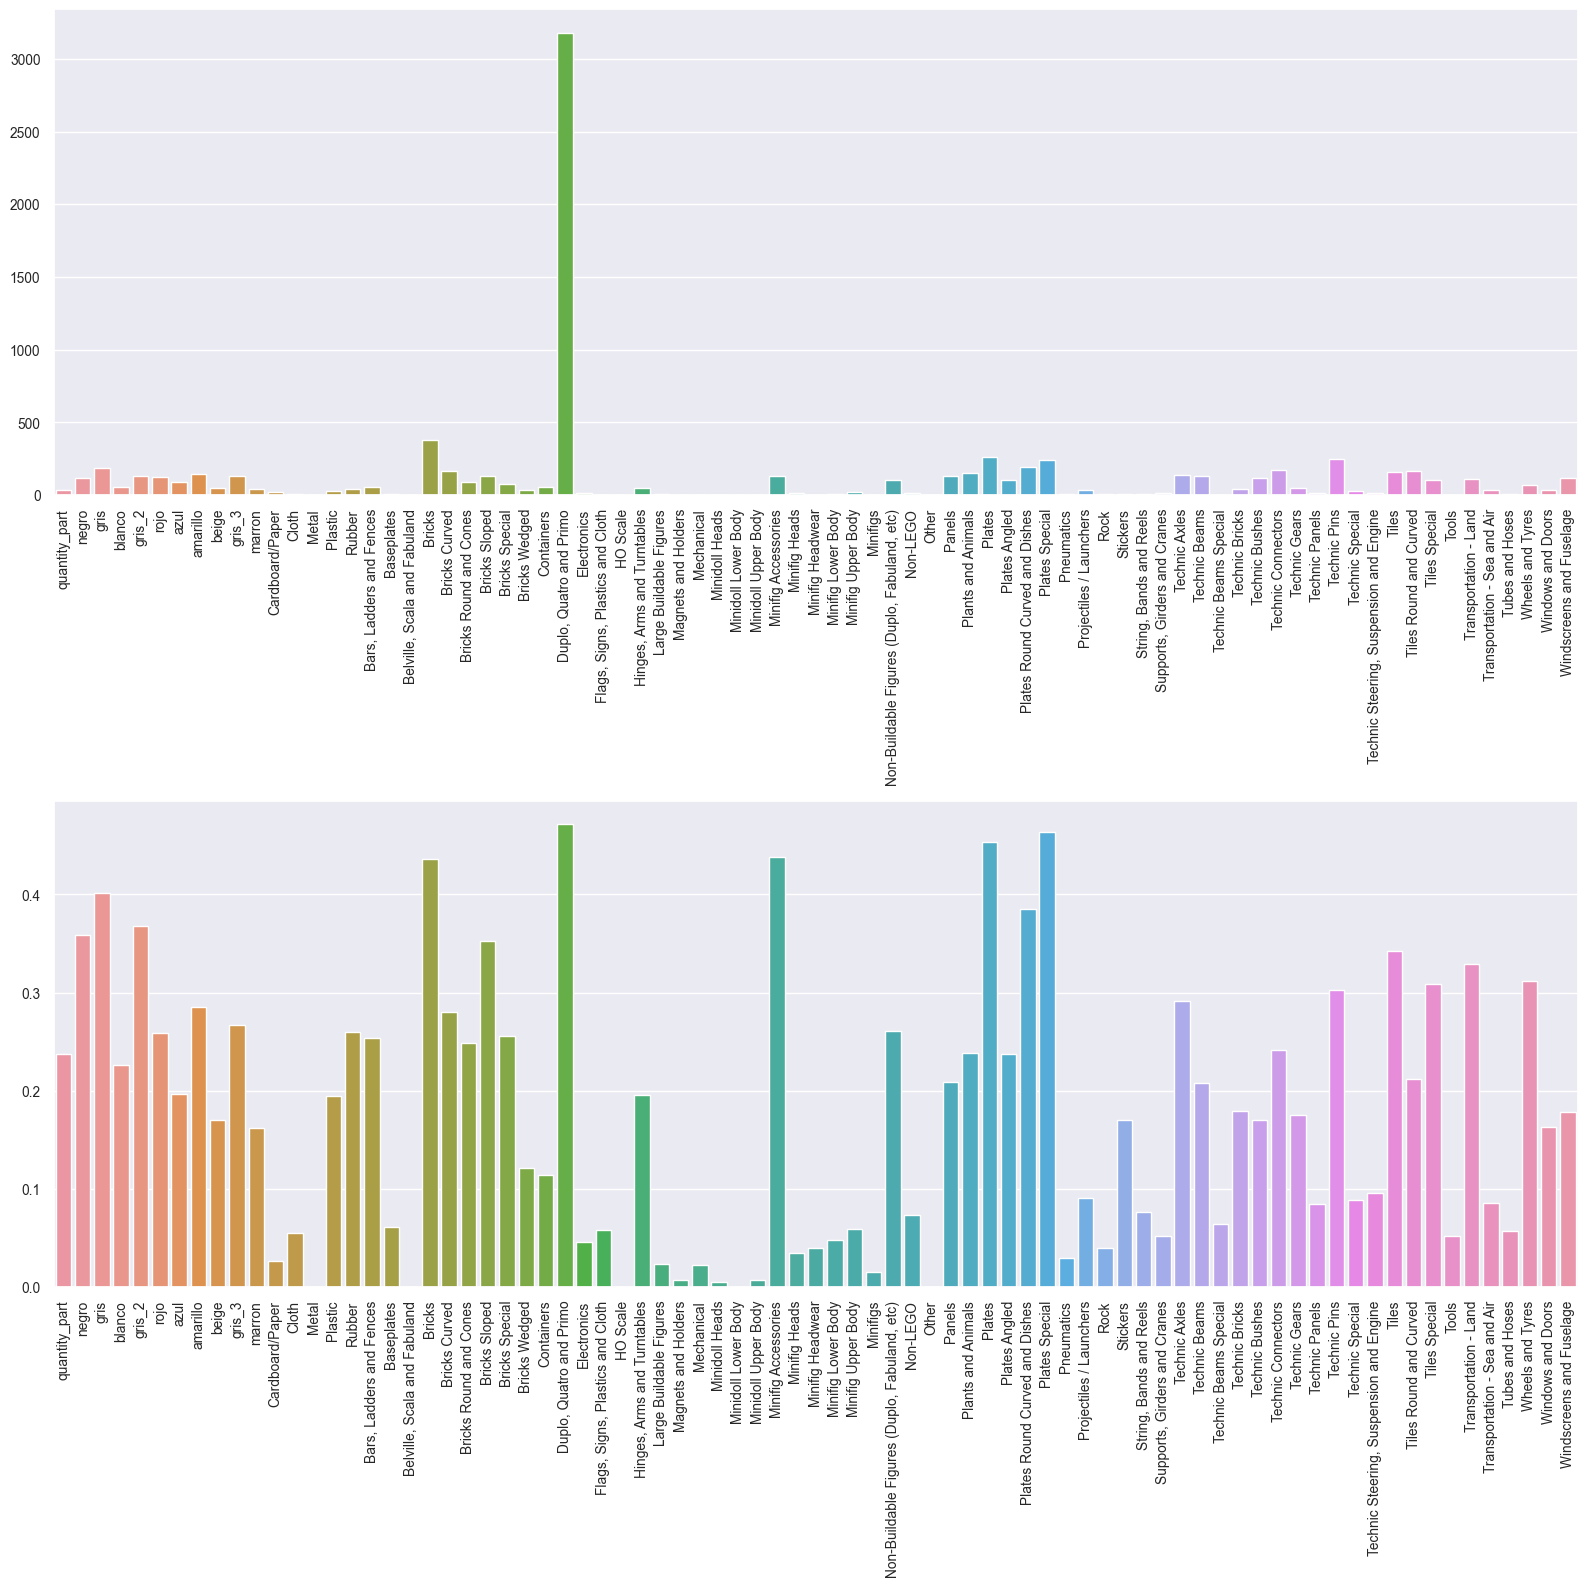

In [111]:
def select_features_anova(X_train, y_train, X_test, k='all'):
    fs = SelectKBest(score_func=f_classif, k=20)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def select_features_mi(X_train, y_train, X_test, k='all'):
    fs = SelectKBest(score_func=mutual_info_classif, k=20)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_anova, X_test_anova, anova = select_features_anova(X_train, y_train, X_test)
fig, axes = plt.subplots(2, 1, figsize=(16, 16))
sns.barplot(x=df_encoded.columns[:-1].values, y=anova.scores_, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

X_train_mi, X_test_mi, mi = select_features_mi(X_train, y_train, X_test)
sns.barplot(x=df_encoded.columns[:-1].values, y=mi.scores_, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [112]:
# Creo selector de características basado en MI
selector = SelectKBest(score_func=mutual_info_classif, k=20)
selector.fit(X, y_encoded)
feature_scores = selector.scores_
# Combino las variables indep y sus puntuaciones en un df
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
# Ordeno el df por puntuación descendente
feature_scores_df = feature_scores_df.sort_values('Score', ascending=False)
# Selecciono las 10 características con las puntuaciones más altas
top_10_features = feature_scores_df.head(20)['Feature'].tolist()
top_10_features

c:\Users\karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['Plates',
 'Duplo, Quatro and Primo',
 'Plates Special',
 'Bricks',
 'Minifig Accessories',
 'gris',
 'Plates Round Curved and Dishes',
 'gris_2',
 'negro',
 'Bricks Sloped',
 'Tiles',
 'Transportation - Land',
 'Tiles Special',
 'Technic Pins',
 'Wheels and Tyres',
 'rojo',
 'Bricks Curved',
 'Technic Axles',
 'amarillo',
 'Bricks Special']

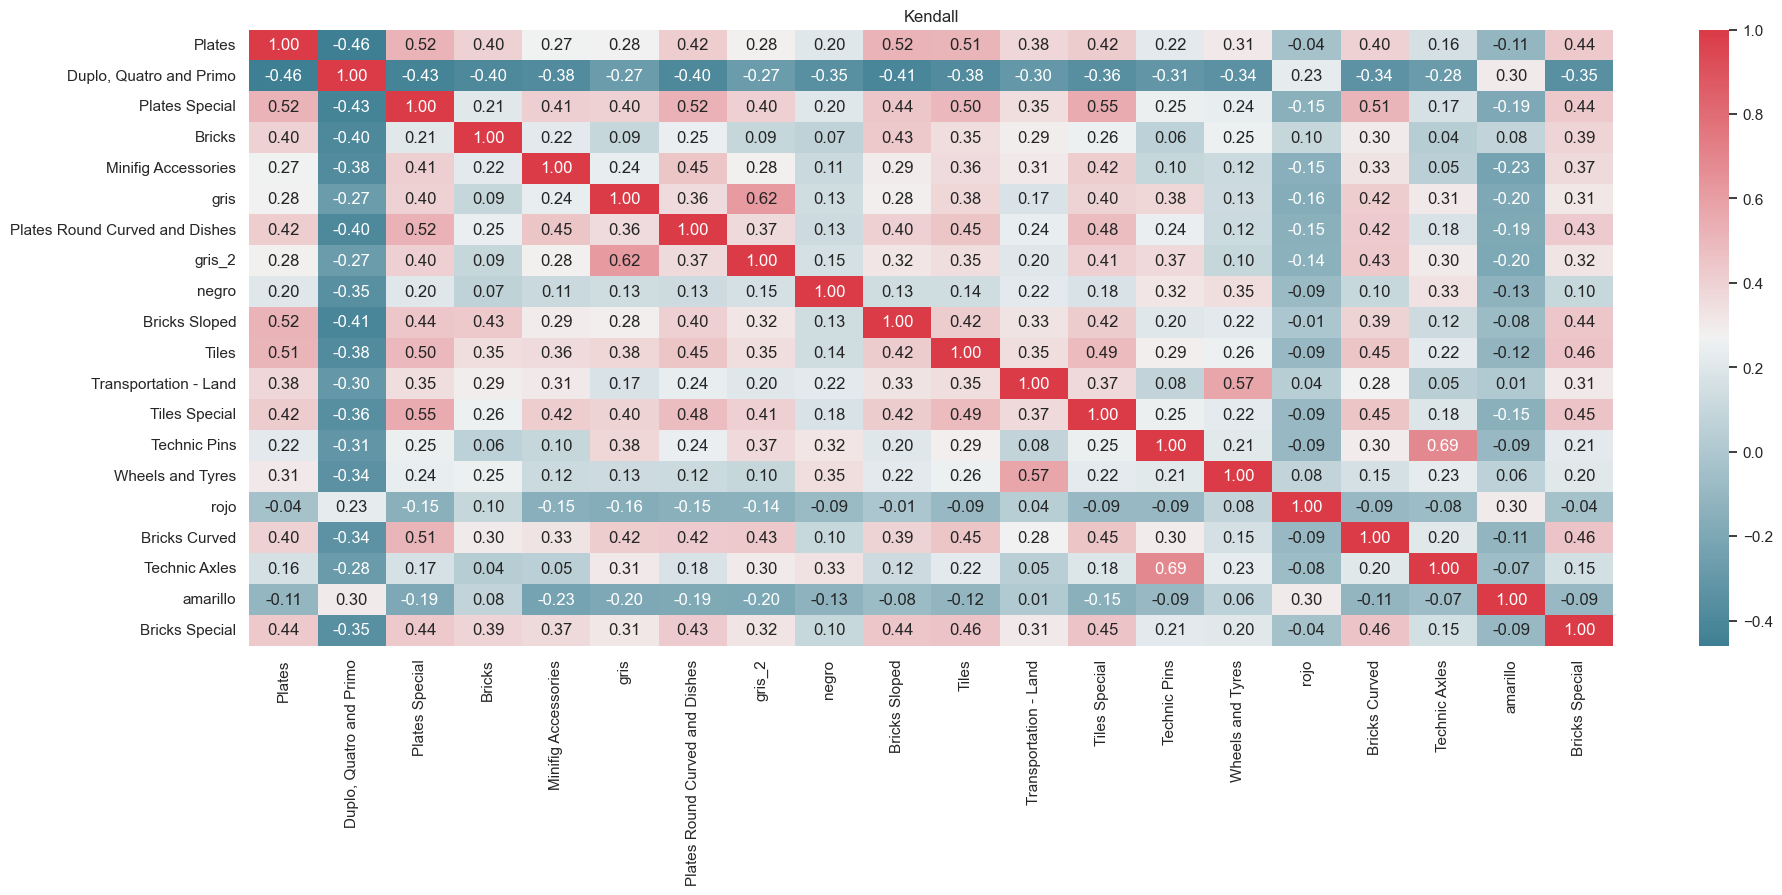

In [126]:
# Kendall b asume que la variable categórica tiene ordinalidad, no es nuestro caso.
fig, axes = plt.subplots(1,1,figsize=(22,8))
tau = df_encoded[top_10_features].corr(method='kendall')
axes.set_title("Kendall")
sns.heatmap(tau, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

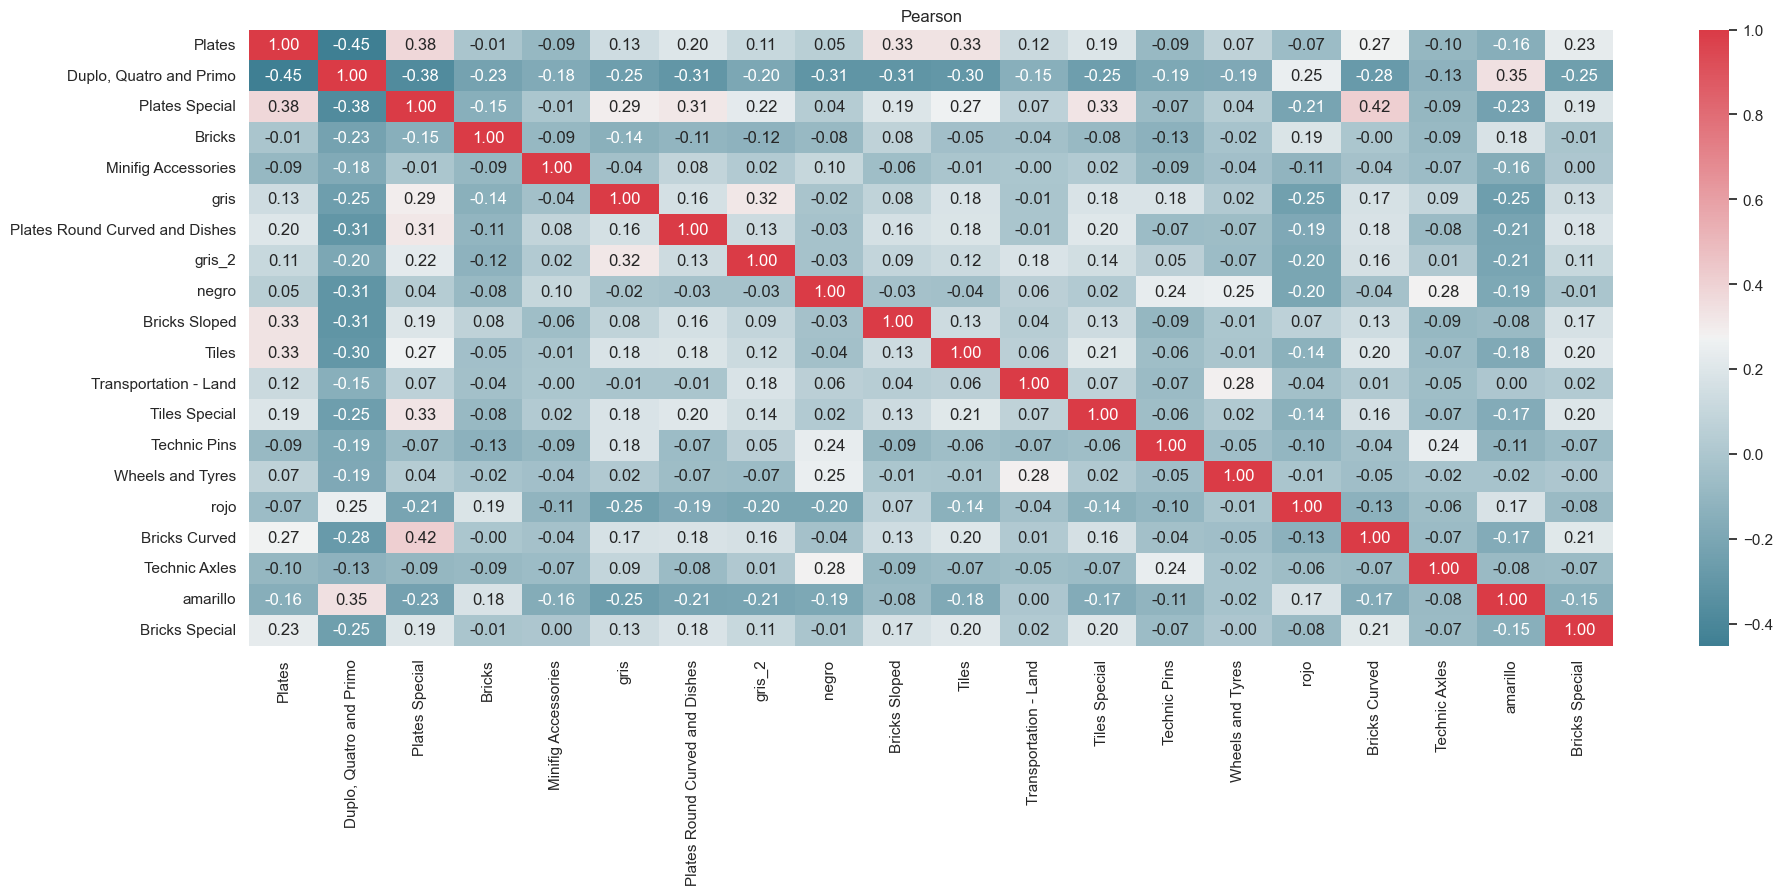

In [125]:
fig, axes = plt.subplots(1, 1, figsize=(22, 8))
axes.set_title("Pearson")
pearson = df_encoded[top_10_features].corr(method='pearson')
sns.heatmap(pearson, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1)
plt.show()

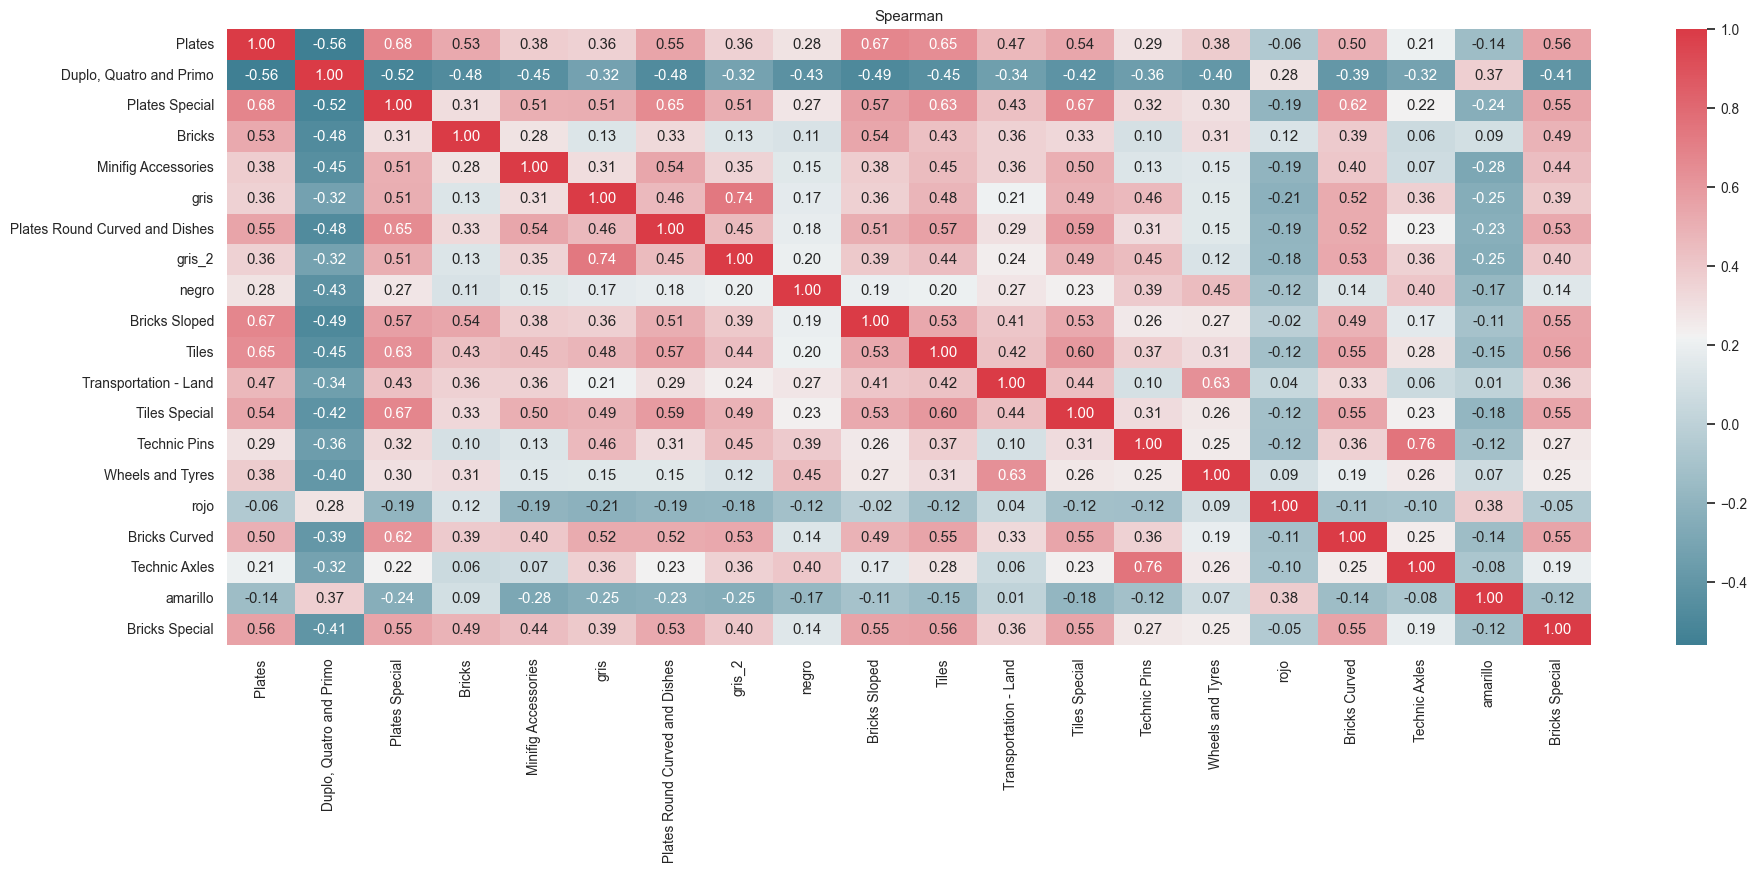

In [127]:
fig, axes = plt.subplots(1, 1, figsize=(22, 8))
axes.set_title("Spearman")
pearson = df_encoded[top_10_features].corr(method='spearman')
sns.heatmap(pearson, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1)
plt.show()

Número de componentes necesarias para explicar el 80% de la varianza: 49


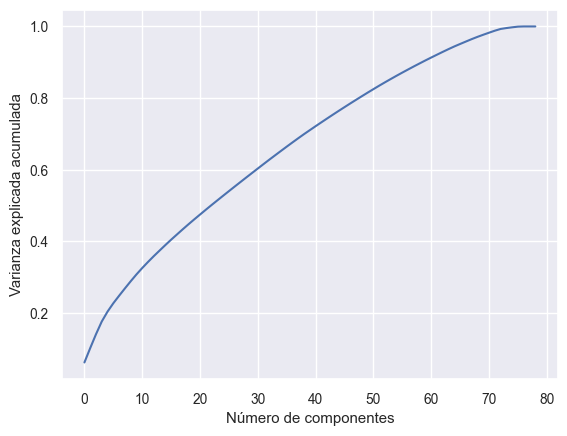

(6733, 49)


In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
# Estandarización de features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit_transform(X_std)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_sum >= 0.8) + 1
print("Número de componentes necesarias para explicar el 80% de la varianza:", n_components)

# 2. Gráficar la variación acumulada
plt.plot(cumulative_sum)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

# Aplicación de PCA explicando 80% de la varianza
pca = PCA(n_components=0.8, random_state=123)
X_transformed = pca.fit_transform(X_std)
print(X_transformed.shape)

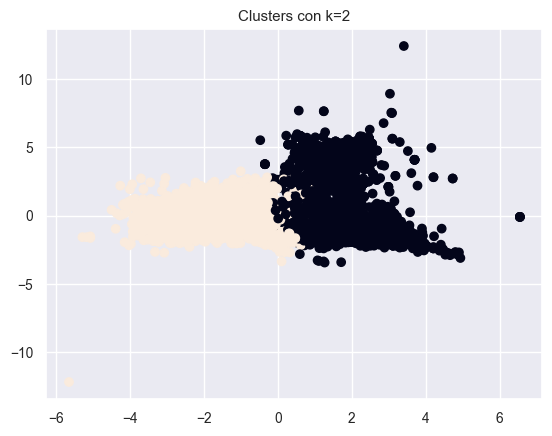

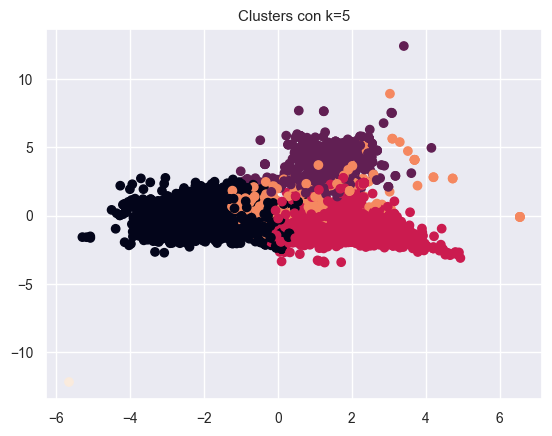

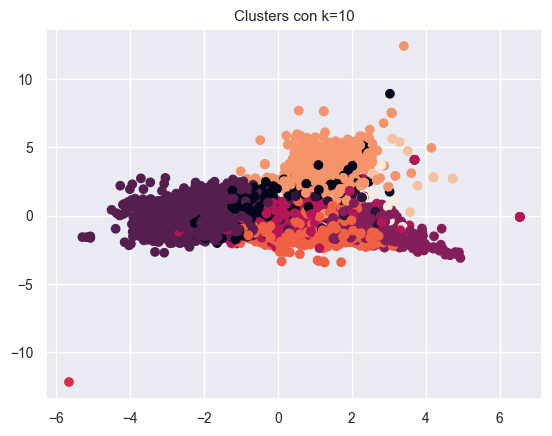

In [133]:
from sklearn.cluster import KMeans
k_values = [2,5,10]

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = kmeans.fit_predict(X_transformed)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels)
    plt.title(f"Clusters con k={k}")
    plt.show()

In [135]:
pca = PCA(n_components=2, random_state=123)
X_transformed = pca.fit_transform(X_std)
print(X_transformed.shape)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
cumulative_sum

# 2 componentes explican solo 10% de la variabilidad en los datos

(6733, 2)


array([0.06159255, 0.10159064])

## 5. Licencia
Este proyecto se encuentra publicado bajo la licencia MIT. En [este enlace](https://opensource.org/licenses/MIT) podrá encontrar más información sobre la misma.